## Loan Case study

### Importing required libraries

In [1169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
import warnings
warnings.filterwarnings("ignore")

#### connecting notebookfile with input folder

In [1170]:
%cd "E:\AI_ML\lending_case_study\loan"


E:\AI_ML\lending_case_study\loan


#### code to see all columns of dataset

In [1171]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### reading loan data file

In [1172]:
loan_df=pd.read_csv("loan.csv")
loan_df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1008.710000          1008.71   
2                   f        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   
1                     1.11       Apr-13           119.66          NaN   
2                     0.00       Jun-14           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                         0.0                          NaN   
1             Sep-13                         0.0                          NaN   
2             May-16                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   
1            1       INDIVIDUAL               NaN        NaN   
2            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   
1                        NaN               0           NaN          NaN   
2                        NaN              

#### Checking shape of the dataframe

In [1173]:
loan_df.shape

(39717, 111)

#### Checking length of dataframe

In [1174]:
len(loan_df)

39717

#### Checking total null values in each column

In [1175]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Filtering columns having all null values

In [1176]:
Column_all_null=loan_df.columns[loan_df.isnull().sum()==len(loan_df)]
Column_all_null

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [1177]:
Column_all_null.shape

(54,)

#### remove these columns and checking shape now

In [1178]:
loan_df=loan_df.drop(Column_all_null, axis=1)

#### getting total null values for each column aftre removing null columns

In [1179]:
loan_df.shape

(39717, 57)

In [1180]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Getting the columns names who is having null values more than 75%

In [1181]:
# min_count =  int(((100-75)/100)*loan_df.shape[0] + 1)
# print(min_count)
# loan_df = loan_df.dropna( axis=1, thresh=min_count)
# loan_df.shape

#### Few more columns where around 90% values are null. So we are going to drop them.

In [1182]:
loan_df=loan_df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)

#### checking shape after removing these columns

In [1183]:
loan_df.shape

(39717, 53)

In [1184]:
loan_df.isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [1185]:
loan_df["emp_title"].value_counts()

US Army                                                                           134
Bank of America                                                                   109
IBM                                                                                66
AT&T                                                                               59
Kaiser Permanente                                                                  56
Wells Fargo                                                                        54
USAF                                                                               54
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
United States Air Force                               

#### Since emp_title and title are Job title provided by borrower. So we can drop these columns.

In [1186]:
loan_df=loan_df.drop(['emp_title','title'],axis=1)

In [1187]:
loan_df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Emp_length could be a important column so we impute null value with 0

In [1188]:
# loan_df["emp_length"].fillna('0',inplace=True)

In [1189]:
loan_df.isnull().sum().sort_values(ascending=False)

emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
last_credit_pull_d               2
total_rec_int                    0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
collection_recovery_fee          0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                               0
member_id                        0
inq_last_6mths      

In [1190]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

#### maximum count for pub_rec_bankruptcies is 0.0 so we can replace null value with 0.0

In [1191]:
loan_df['pub_rec_bankruptcies'].fillna(0.0,inplace=True)

In [1192]:
loan_df['last_pymnt_d'].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-12     832
Jan-14     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Apr-16     220
Mar-16     216
Oct-10     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Dec-15     176
Sep-10     176
Feb-16    

In [1193]:
loan_df.isnull().sum().sort_values(ascending=False)

emp_length                    1075
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
last_credit_pull_d               2
total_rec_int                    0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
collection_recovery_fee          0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
pub_rec_bankruptcies             0
revol_bal                        0
id                               0
member_id                        0
inq_last_6mths      

In [1194]:
loan_df["last_credit_pull_d"].value_counts().idxmax()

'May-16'

In [1195]:
loan_df["last_credit_pull_d"].fillna(loan_df["last_credit_pull_d"].value_counts().idxmax(),inplace=True)
loan_df["last_pymnt_d"].fillna(loan_df["last_pymnt_d"].value_counts().idxmax(),inplace=True)
loan_df['revol_util'].fillna(loan_df['revol_util'].value_counts().idxmax(),inplace=True)

In [1196]:
loan_df.isnull().sum().sort_values(ascending=False)

emp_length                    1075
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
tax_liens                       39
total_rec_late_fee               0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
collection_recovery_fee          0
recoveries                       0
pub_rec                          0
last_pymnt_d                     0
last_pymnt_amnt                  0
last_credit_pull_d               0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
pub_rec_bankruptcies             0
revol_bal                        0
id                               0
member_id                        0
inq_last_6mths      

In [1197]:
loan_df['chargeoff_within_12_mths'].value_counts()
#so we can fill null value with 0.0

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [1198]:
loan_df['chargeoff_within_12_mths'].fillna(0.0,inplace=True)

In [1199]:
loan_df['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [1200]:
loan_df['collections_12_mths_ex_med'].fillna(0.0,inplace=True)

In [1201]:
loan_df['revol_util'].value_counts()

0%        1027
0.20%       63
63%         62
40.70%      58
66.70%      58
0.10%       58
31.20%      57
61%         57
46.40%      57
66.60%      57
65.90%      56
70.40%      56
57.40%      55
49.80%      55
48.90%      55
25.50%      55
37.60%      55
64.80%      55
27.20%      54
89.50%      54
35.30%      54
46.60%      54
51.10%      54
32%         54
76.60%      54
68.60%      54
78.70%      54
75.50%      54
64.60%      54
51.60%      54
72.10%      53
62.80%      53
54.30%      53
45.60%      53
55.80%      53
48.20%      53
47.80%      53
68.70%      53
33.70%      53
70.80%      53
34.40%      53
41%         53
70.10%      52
66.90%      52
55.10%      52
53.90%      52
51.50%      52
48%         52
41.60%      52
29.10%      52
70.30%      52
55.50%      52
74.90%      52
36.50%      52
40.20%      51
58.70%      51
41.40%      51
49.10%      51
89.90%      51
43.40%      51
30.90%      51
54.10%      51
35.70%      51
45.90%      51
88%         51
66.10%      51
49.60%    

In [1202]:
loan_df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [1203]:
loan_df['tax_liens'].fillna(0.0,inplace=True)

In [1204]:
loan_df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [1205]:
loan_df=loan_df.drop('url',axis=1)

In [1206]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4   12.69%        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                      

In [1207]:
loan_df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc           

In [1208]:
loan_df.isnull().sum().sort_values(ascending=False)

emp_length                    1075
id                               0
collection_recovery_fee          0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
last_pymnt_d                     0
revol_bal                        0
last_pymnt_amnt                  0
last_credit_pull_d               0
collections_12_mths_ex_med       0
policy_code                      0
application_type                 0
acc_now_delinq                   0
chargeoff_within_12_mths         0
delinq_amnt                      0
pub_rec_bankruptcies             0
revol_util                       0
pub_rec                          0
member_id                        0
open_acc                         0
loan_amnt           

In [1209]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   10.65%       162.87     B        B2  10+ years           RENT     24000.0   
1   15.27%        59.83     C        C4   < 1 year           RENT     30000.0   
2   15.96%        84.33     C        C5  10+ years           RENT     12252.0   
3   13.49%       339.31     C        C1  10+ years           RENT     49200.0   
4   12.69%        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                      

In [1210]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [1211]:
loan_df.shape

(39717, 50)

In [1212]:
loan_df["id"].is_unique

True

In [1213]:
loan_df["member_id"].is_unique

True

#### Since both id and member_id have unique values so we can remove any one of them

In [1214]:
loan_df=loan_df.drop(['member_id'],axis=1)

In [1215]:
loan_df.shape

(39717, 49)

In [1216]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   charge

In [1217]:
loan_df.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status 

In [1218]:
# loan_df.to_excel("output.xlsx")

#### As per data dict for emp_lenght column 0 means less than one year and 10 means ten or more years. So need to discuss on it

In [1219]:
loan_df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [1220]:
# loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("+")[0])
# loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("years")[0])
# loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x:0 if x=="0" else str(x).split("year")[0])

In [1221]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [1222]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   
2         2        0       2956     98.50%         10                   f   
3        10        0       5598        21%         37                   f   
4        15        0      27783     53.90%         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   charge

#### writing int_rate in float format

In [1223]:
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x:0 if x=="0" else float(str(x).split("%")[0]))

#### writing integer part only in term

In [1224]:
loan_df["term"] = loan_df["term"].apply(lambda x:0 if x=="0" else int(str(x).split("months")[0]))

#### removing % in revol_util

In [1225]:
loan_df["revol_util"] = loan_df["revol_util"].apply(lambda x:0 if x=="0" else float(str(x).split("%")[0]))

In [1226]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0         3        0      13648        83.7          9                   f   
1         3        0       1687         9.4          4                   f   
2         2        0       2956        98.5         10                   f   
3        10        0       5598        21.0         37                   f   
4        15        0      27783        53.9         38                   f   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  deli

#### Since zip code is not given completely so not required for analysis. removing this

In [1227]:
loan_df=loan_df.drop('zip_code', axis=1)

In [1228]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   
3         CA  20.00            0           Feb-96               1        10   
4         OR  17.94            0           Jan-96               0        15   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0        0      13648        83.7          9                   f       0.00   
1        0       1687         9.4          4                   f       0.00   
2        0       2956        98.5         10                   f       0.00   
3        0       5598        21.0         37                   f       0.00   
4        0      27783        53.9         38                   f     524.06   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       Jan-15           171.62             May-16   
1       Apr-13           119.66             Sep-13   
2       Jun-14           649.91             May-16   
3       Jan-15           357.48             Apr-16   
4       May-16            67.79             May-16   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL               0   
1                         0.0            1       INDIVIDUAL               0   
2                         0.0            1       INDIVIDUAL               0   
3                         0.0            1       INDIVIDUAL               0   
4                         0.0            1       INDIVIDUAL               0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0          

#### collection categotical columns in a list

In [1229]:
cat_cols = ["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "application_type"]

Countplot of: grade


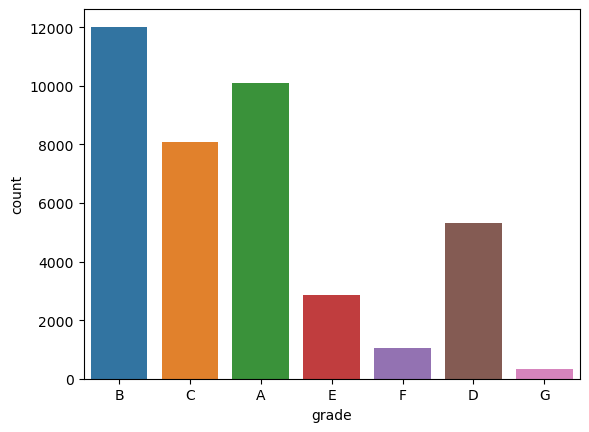

Countplot of: sub_grade


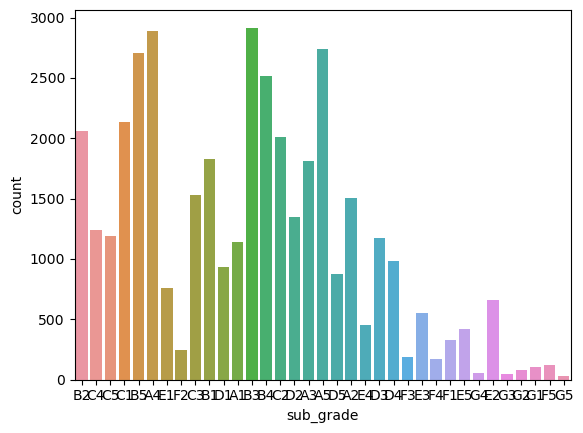

Countplot of: home_ownership


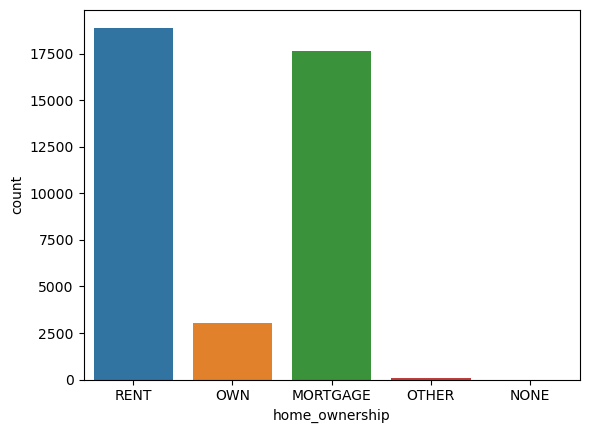

Countplot of: verification_status


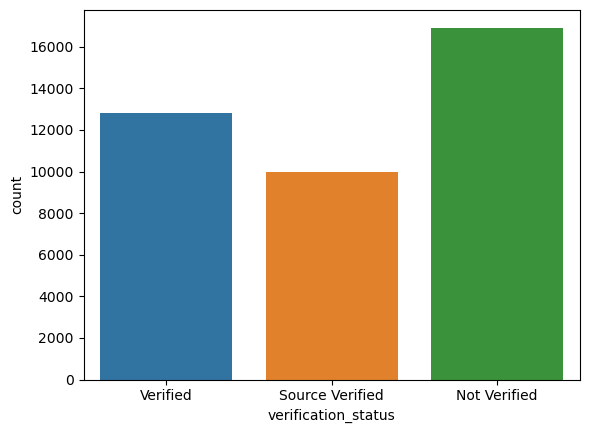

Countplot of: loan_status


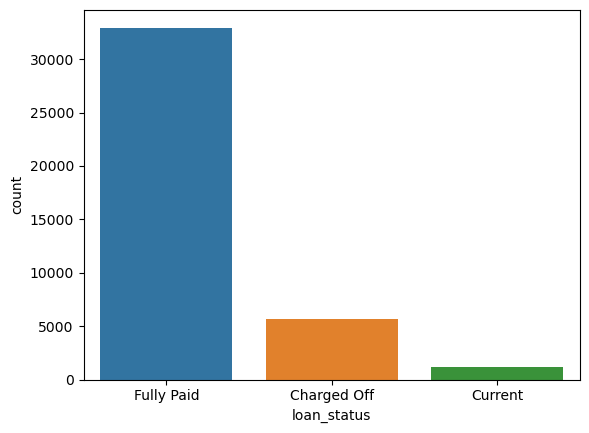

Countplot of: purpose


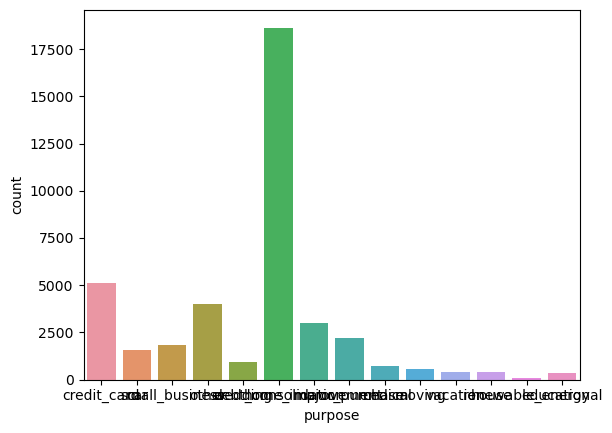

Countplot of: application_type


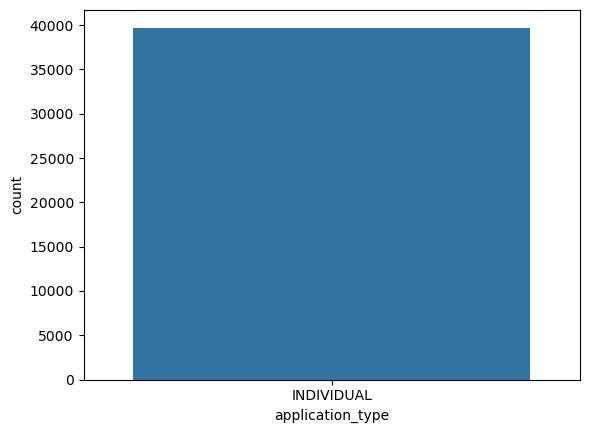

In [1230]:
for i in cat_cols:
    print("Countplot of: " + i)
    sns.countplot(loan_df[i])
    plt.show()

#### boxplot between cat_cols and cont_cols

Boxplot of: grade & loan_amnt


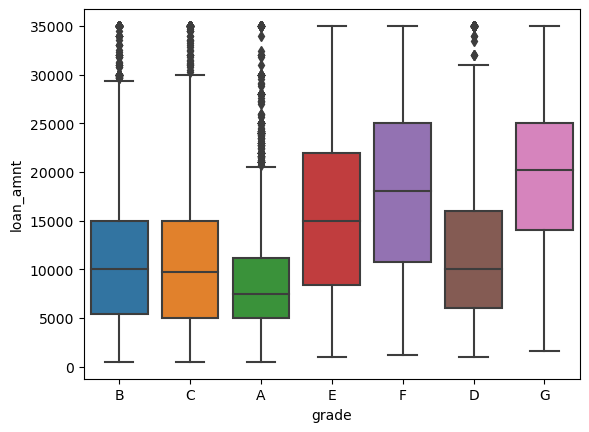

Boxplot of: grade & funded_amnt


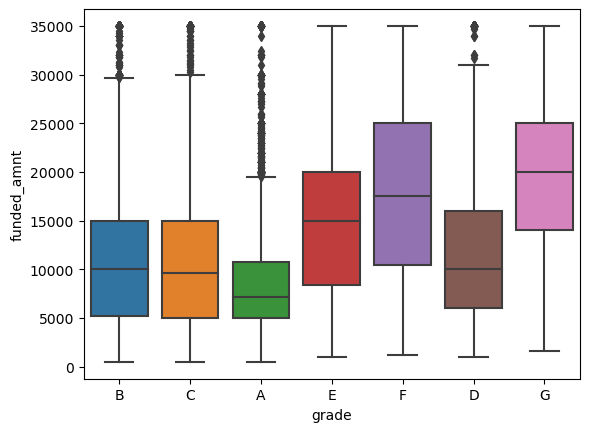

Boxplot of: grade & funded_amnt_inv


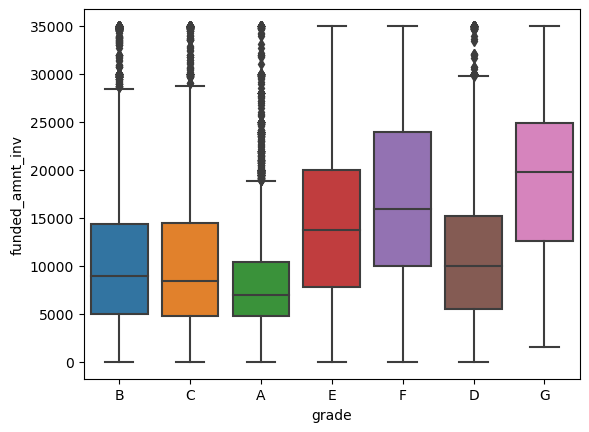

Boxplot of: grade & int_rate


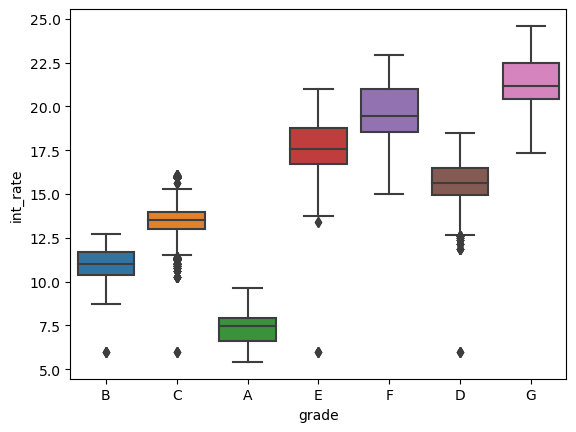

Boxplot of: grade & installment


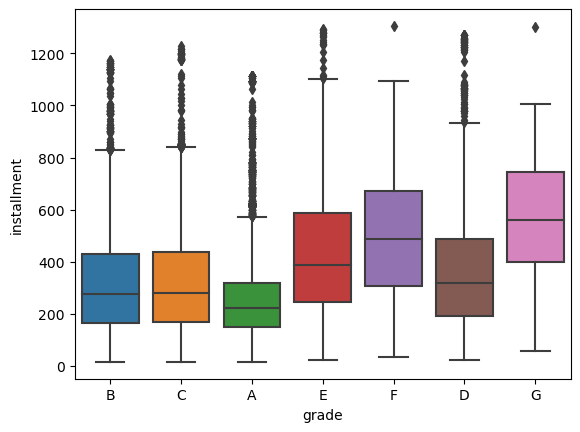

Boxplot of: grade & annual_inc


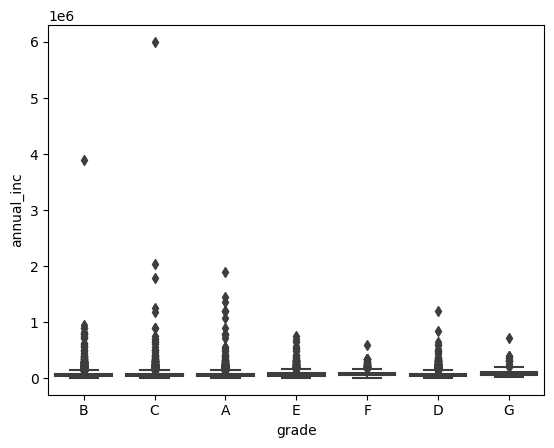

Boxplot of: grade & dti


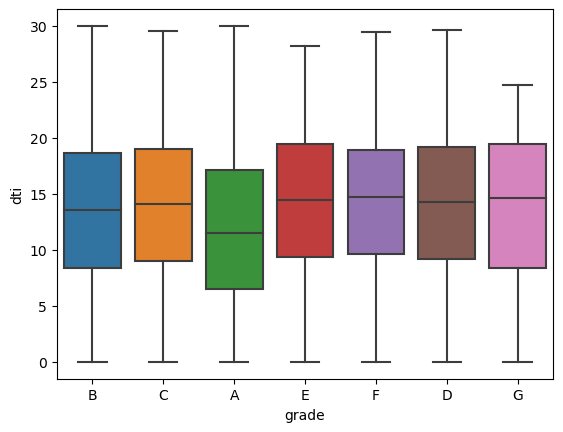

Boxplot of: grade & delinq_2yrs


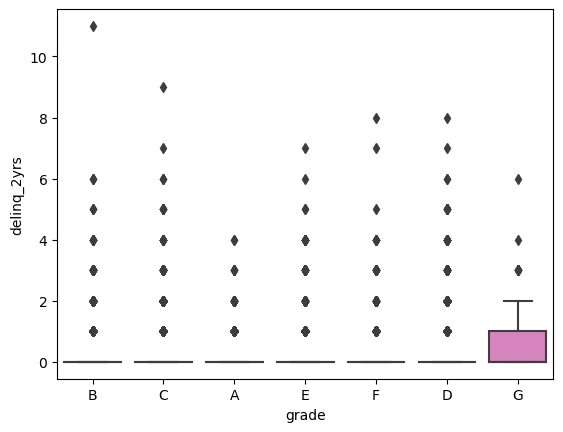

Boxplot of: grade & inq_last_6mths


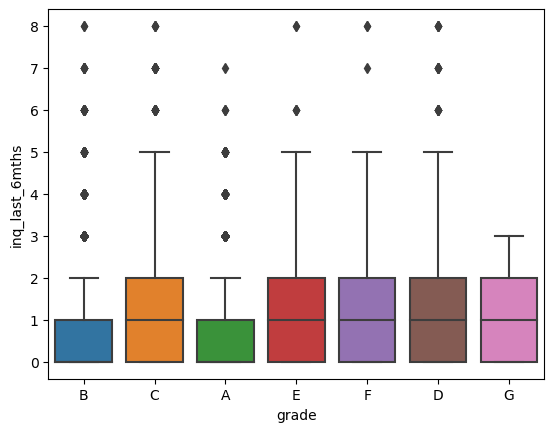

Boxplot of: grade & open_acc


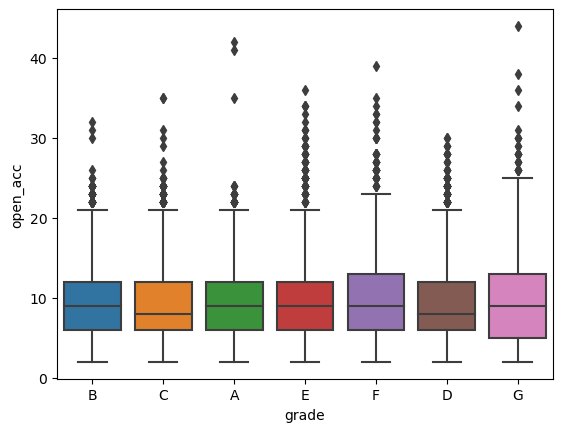

Boxplot of: grade & pub_rec


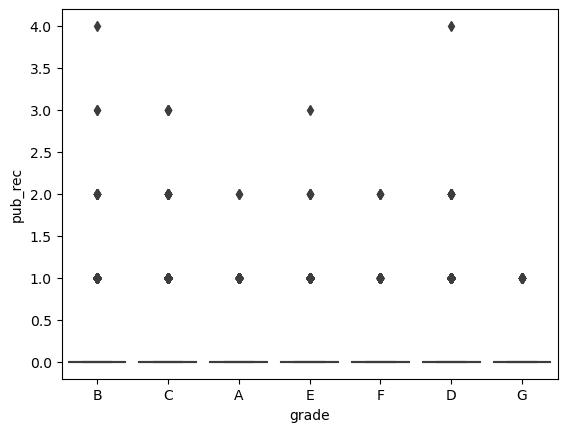

Boxplot of: grade & revol_bal


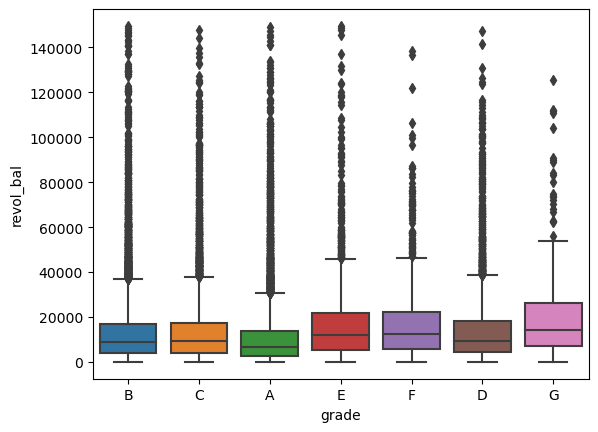

Boxplot of: grade & revol_util


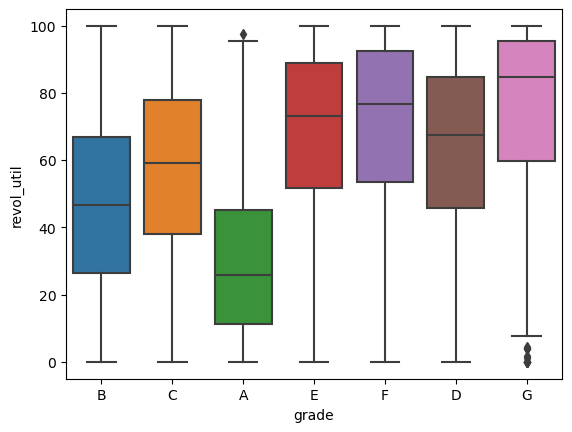

Boxplot of: grade & total_acc


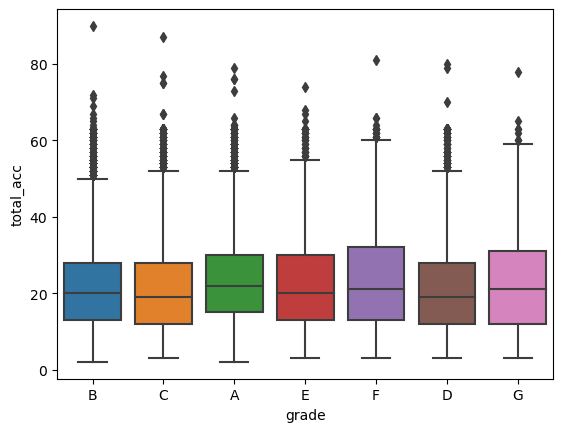

Boxplot of: grade & total_pymnt


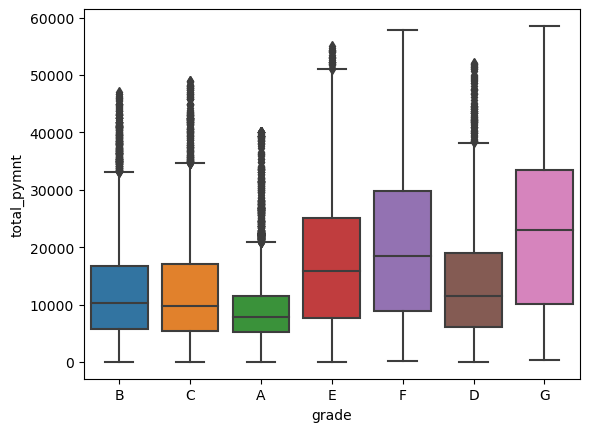

Boxplot of: sub_grade & loan_amnt


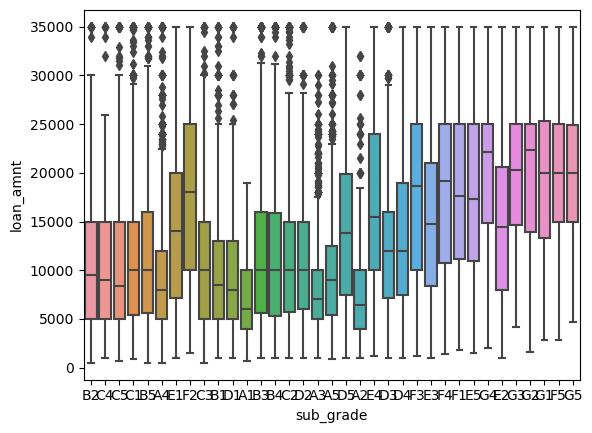

Boxplot of: sub_grade & funded_amnt


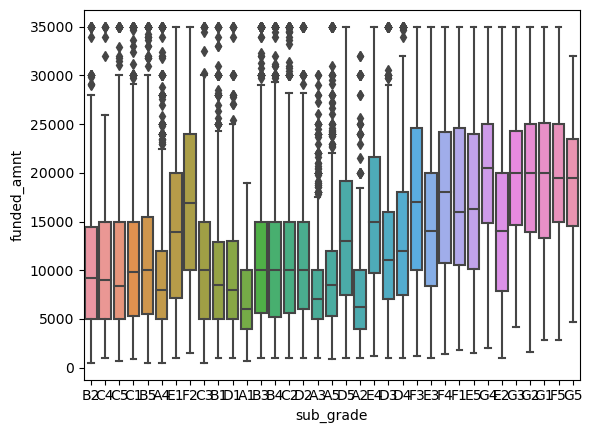

Boxplot of: sub_grade & funded_amnt_inv


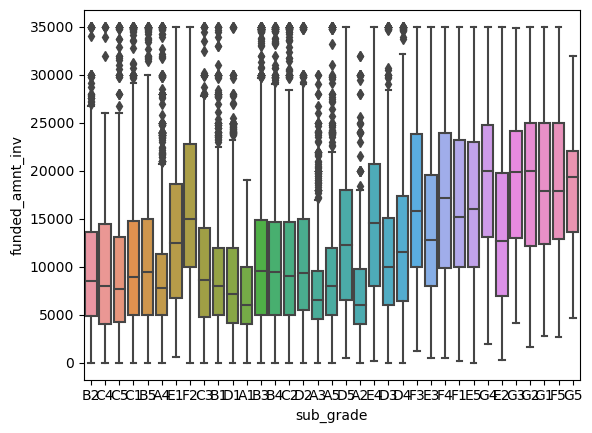

Boxplot of: sub_grade & int_rate


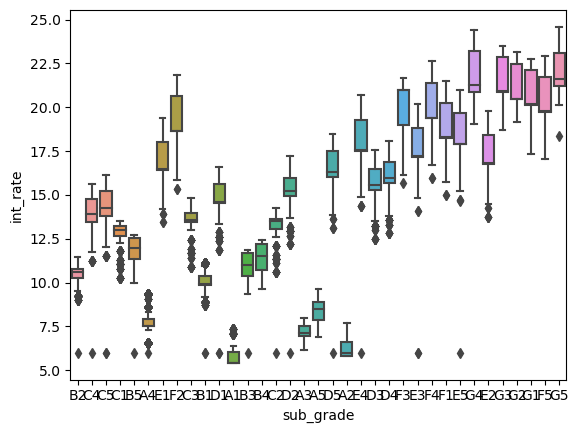

Boxplot of: sub_grade & installment


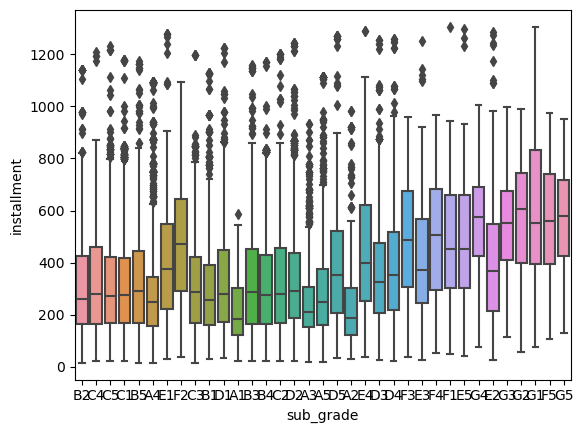

Boxplot of: sub_grade & annual_inc


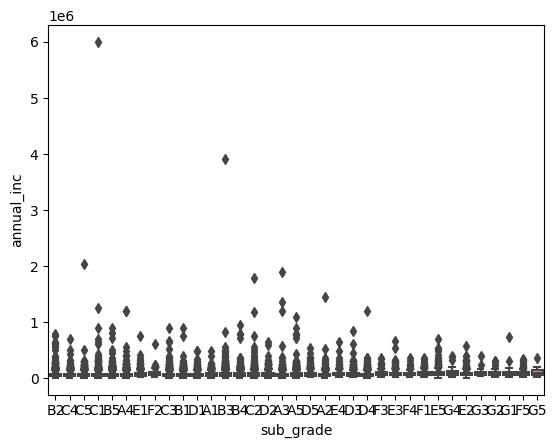

Boxplot of: sub_grade & dti


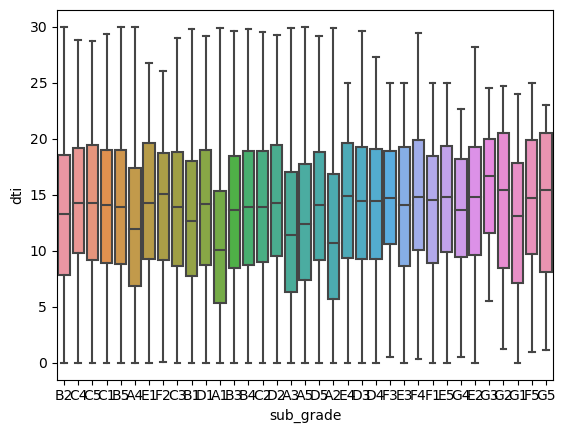

Boxplot of: sub_grade & delinq_2yrs


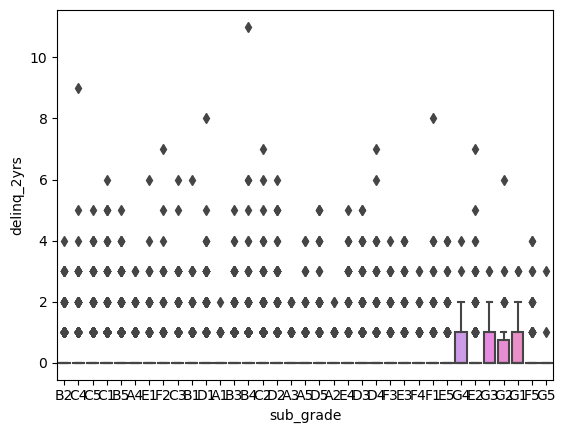

Boxplot of: sub_grade & inq_last_6mths


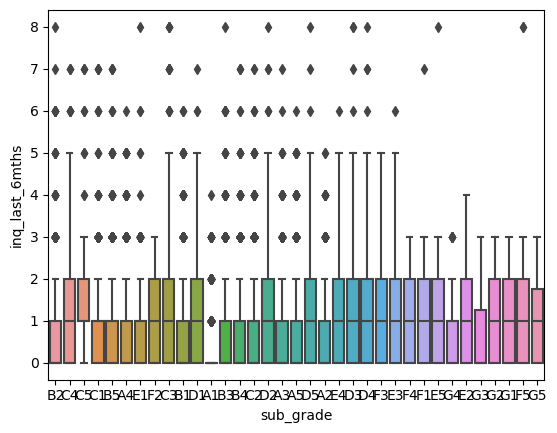

Boxplot of: sub_grade & open_acc


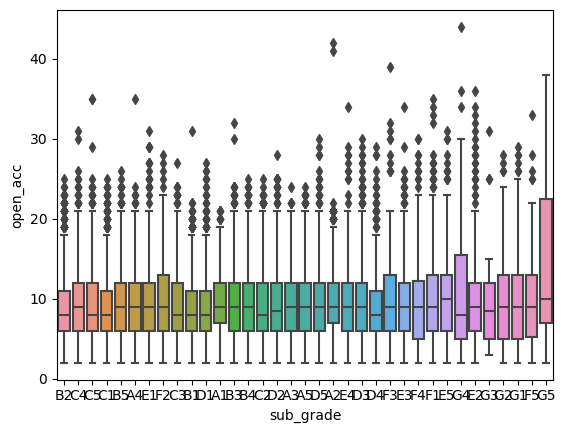

Boxplot of: sub_grade & pub_rec


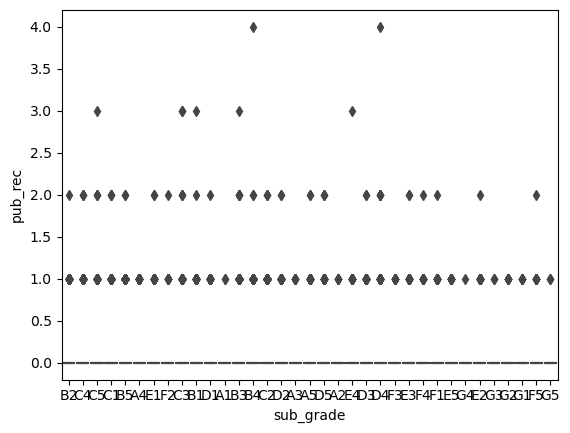

Boxplot of: sub_grade & revol_bal


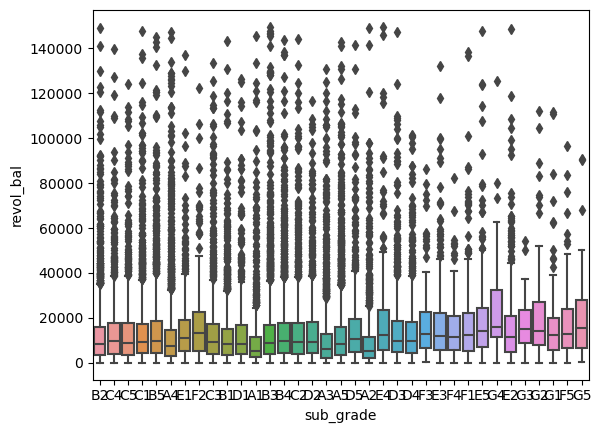

Boxplot of: sub_grade & revol_util


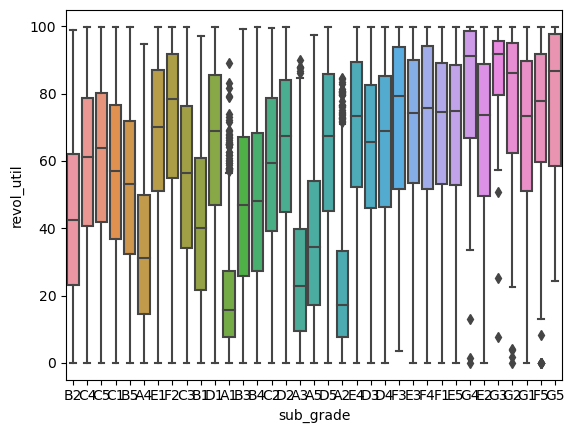

Boxplot of: sub_grade & total_acc


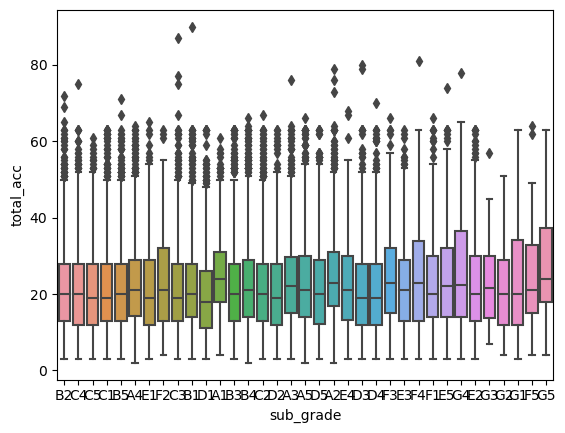

Boxplot of: sub_grade & total_pymnt


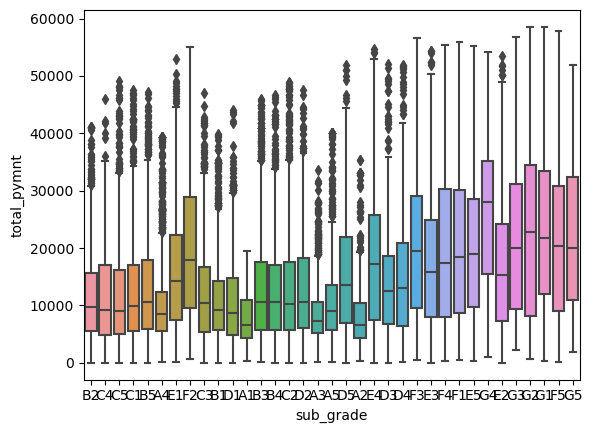

Boxplot of: home_ownership & loan_amnt


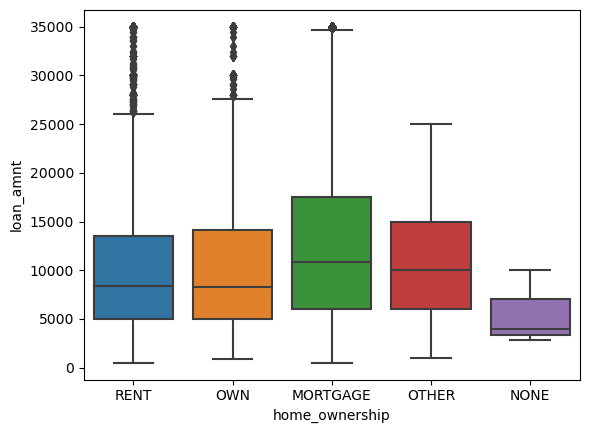

Boxplot of: home_ownership & funded_amnt


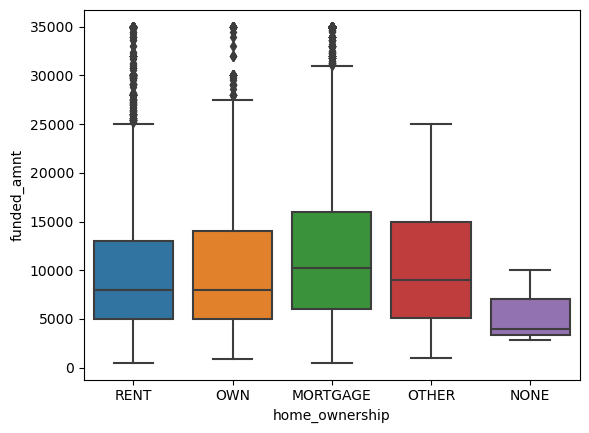

Boxplot of: home_ownership & funded_amnt_inv


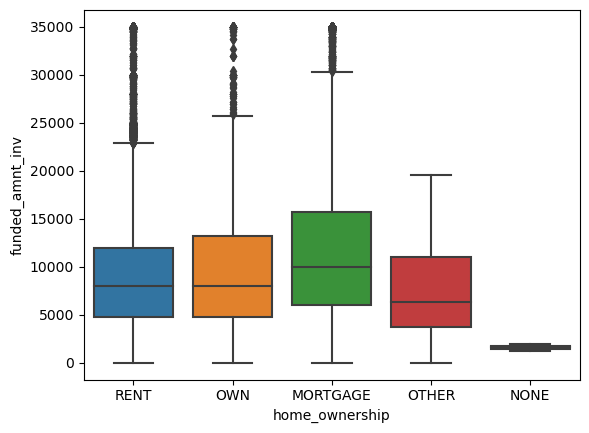

Boxplot of: home_ownership & int_rate


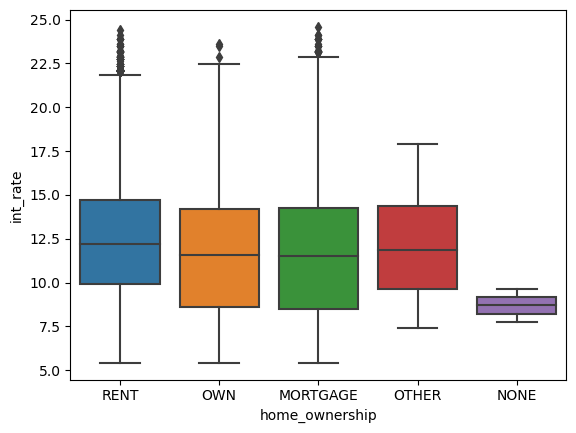

Boxplot of: home_ownership & installment


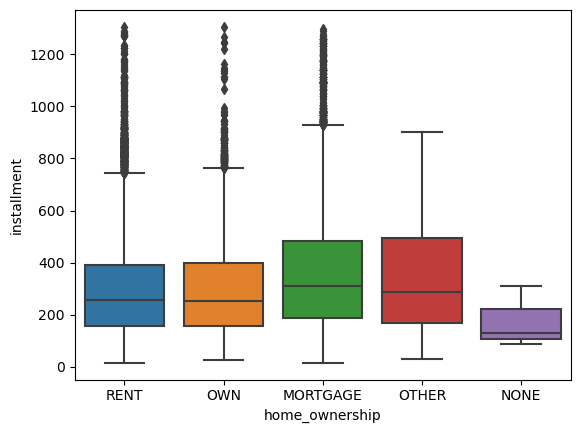

Boxplot of: home_ownership & annual_inc


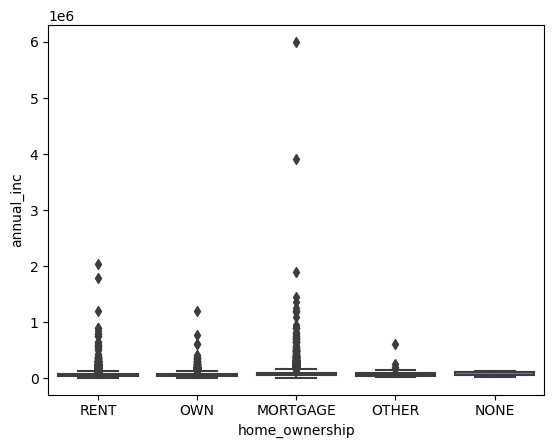

Boxplot of: home_ownership & dti


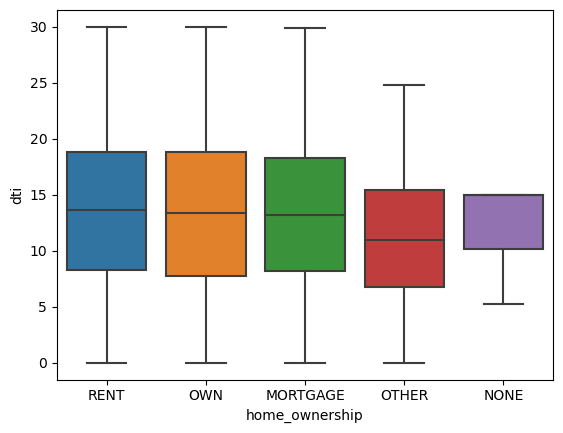

Boxplot of: home_ownership & delinq_2yrs


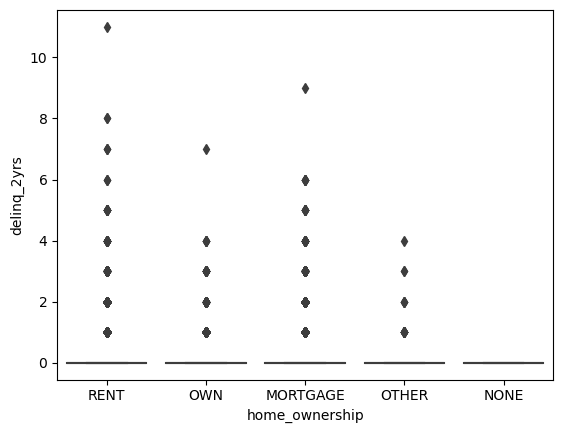

Boxplot of: home_ownership & inq_last_6mths


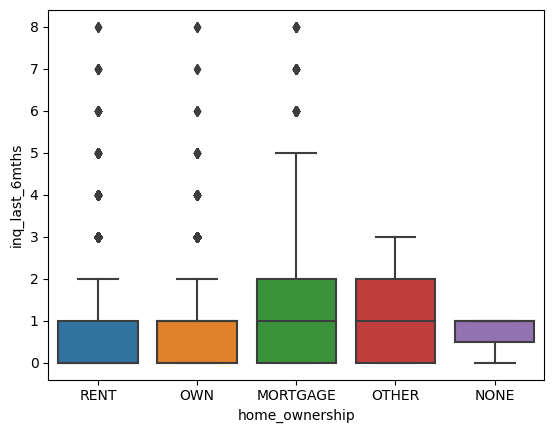

Boxplot of: home_ownership & open_acc


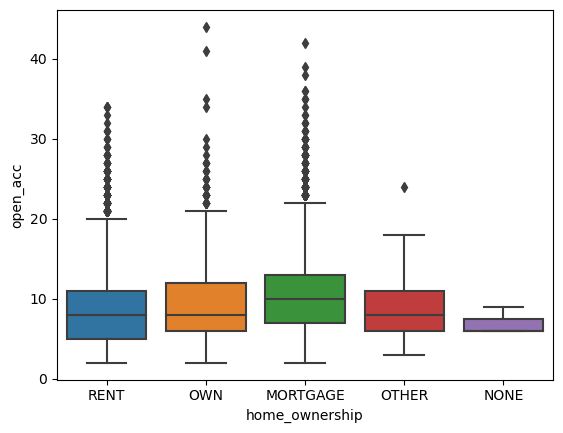

Boxplot of: home_ownership & pub_rec


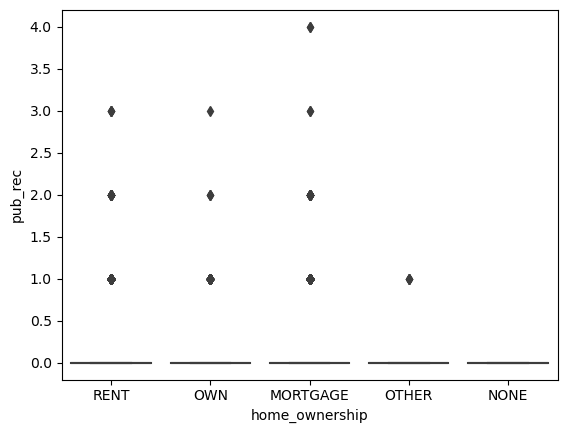

Boxplot of: home_ownership & revol_bal


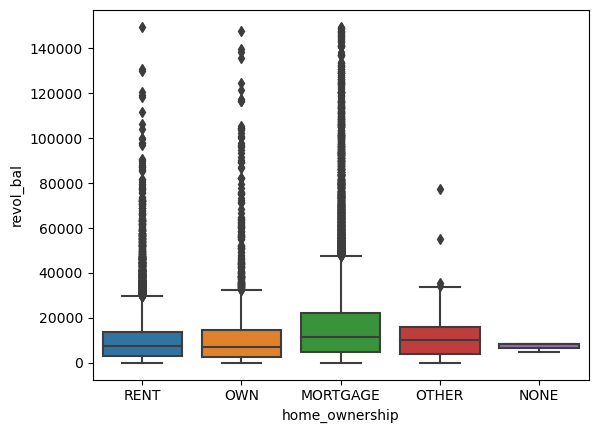

Boxplot of: home_ownership & revol_util


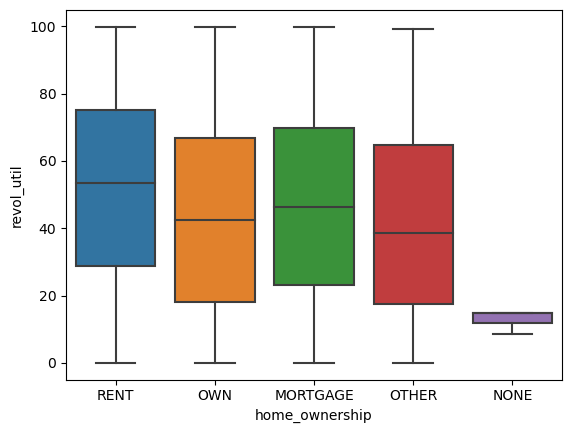

Boxplot of: home_ownership & total_acc


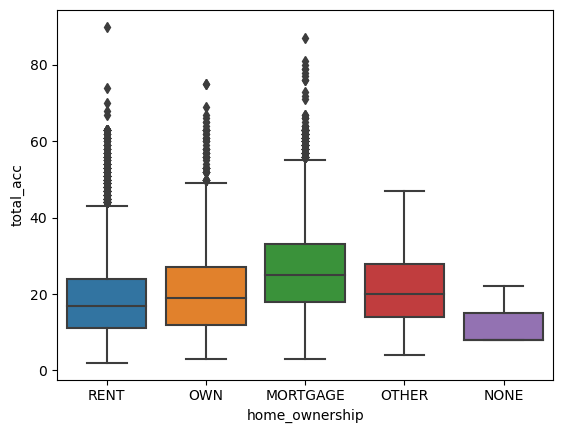

Boxplot of: home_ownership & total_pymnt


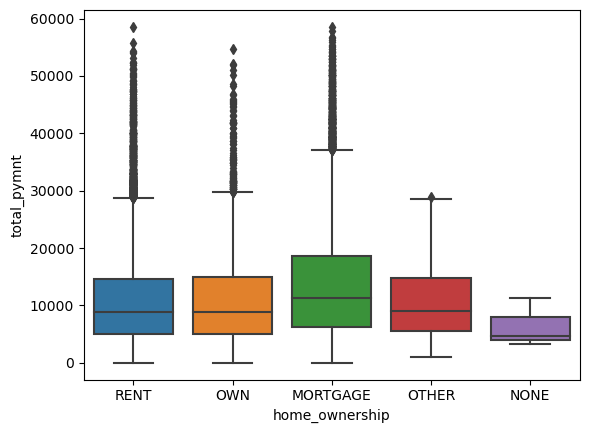

Boxplot of: verification_status & loan_amnt


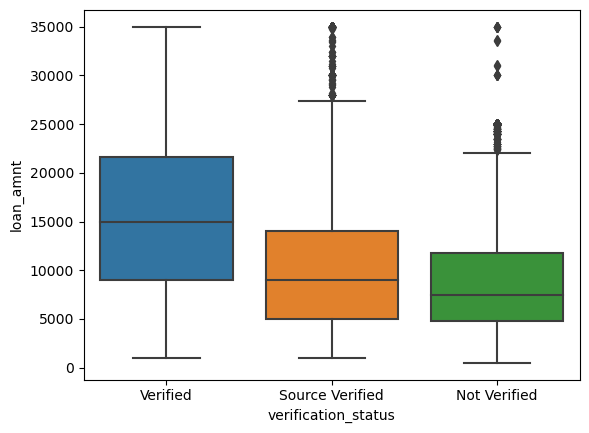

Boxplot of: verification_status & funded_amnt


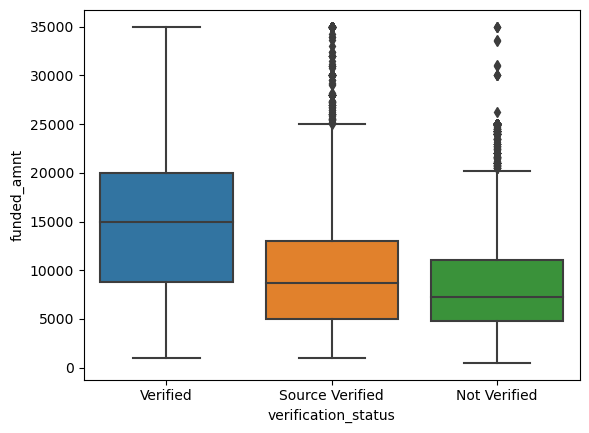

Boxplot of: verification_status & funded_amnt_inv


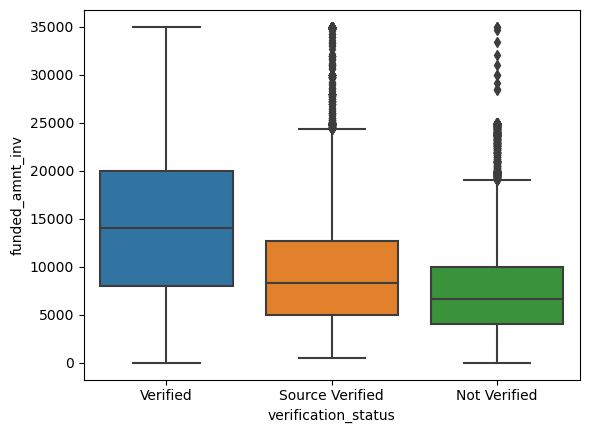

Boxplot of: verification_status & int_rate


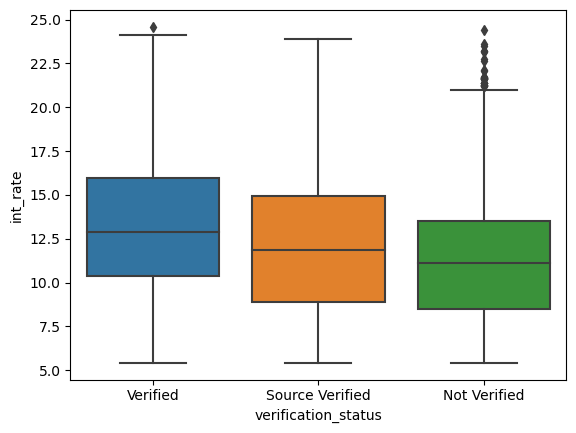

Boxplot of: verification_status & installment


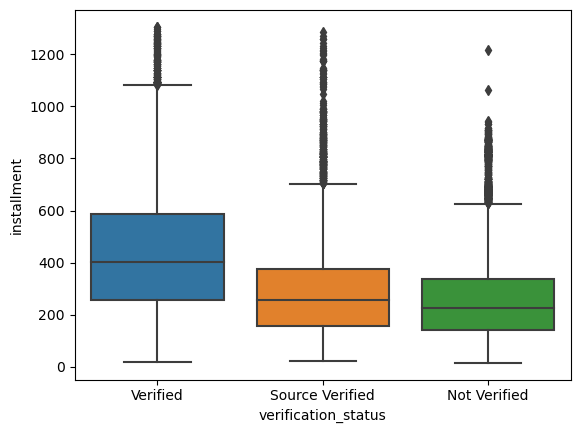

Boxplot of: verification_status & annual_inc


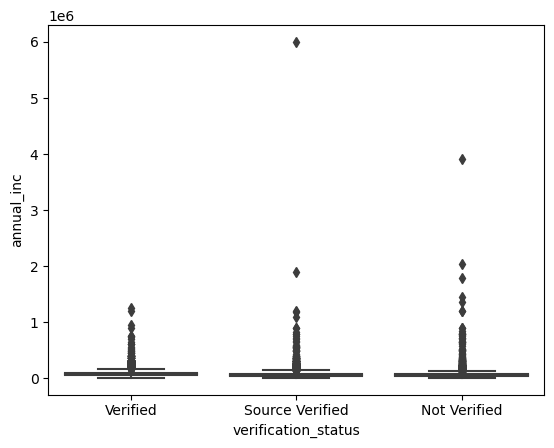

Boxplot of: verification_status & dti


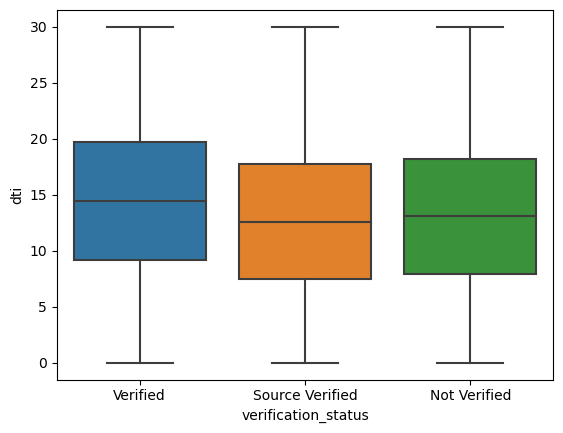

Boxplot of: verification_status & delinq_2yrs


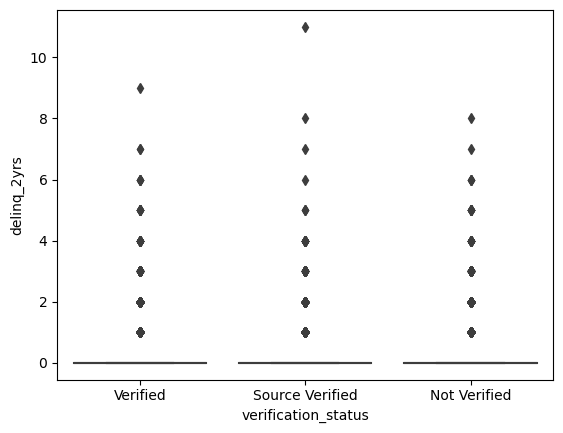

Boxplot of: verification_status & inq_last_6mths


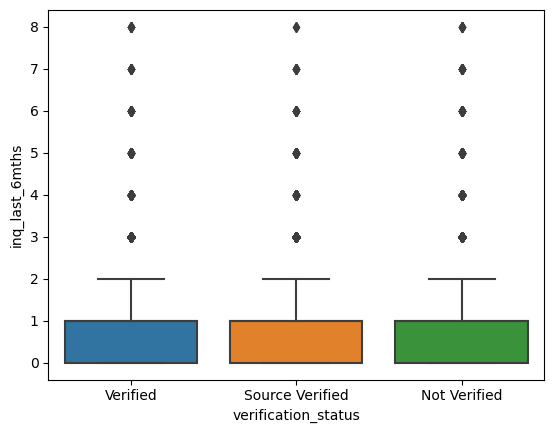

Boxplot of: verification_status & open_acc


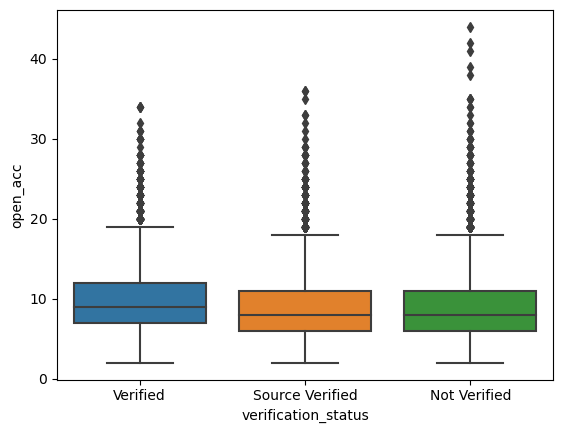

Boxplot of: verification_status & pub_rec


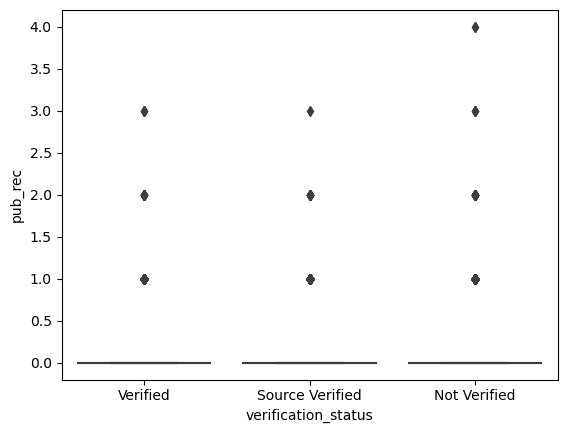

Boxplot of: verification_status & revol_bal


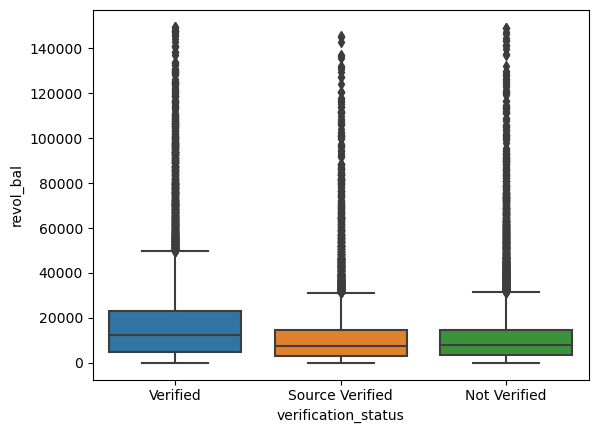

Boxplot of: verification_status & revol_util


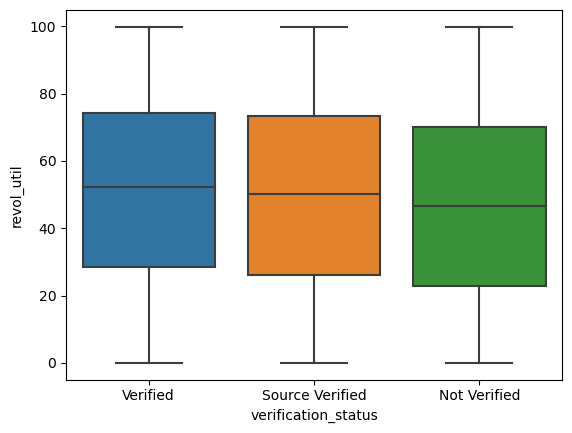

Boxplot of: verification_status & total_acc


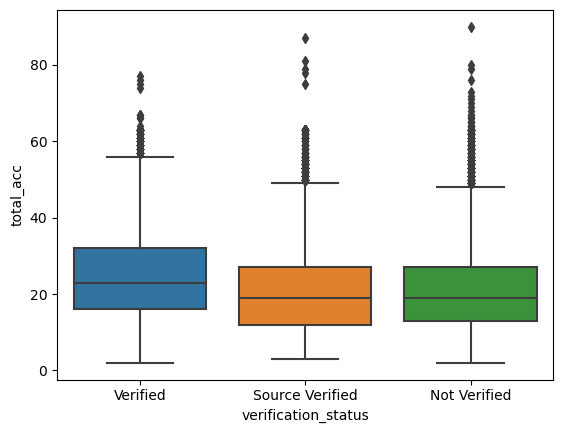

Boxplot of: verification_status & total_pymnt


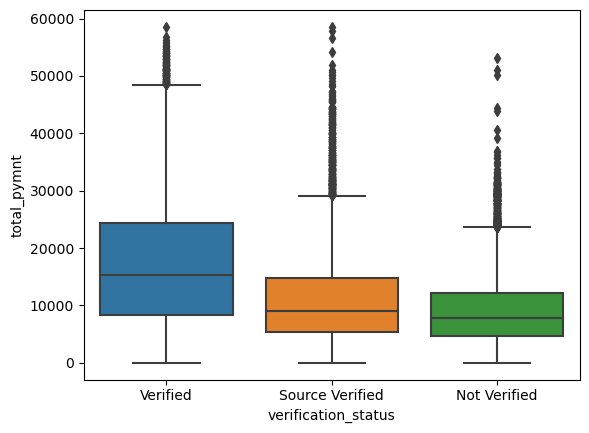

Boxplot of: loan_status & loan_amnt


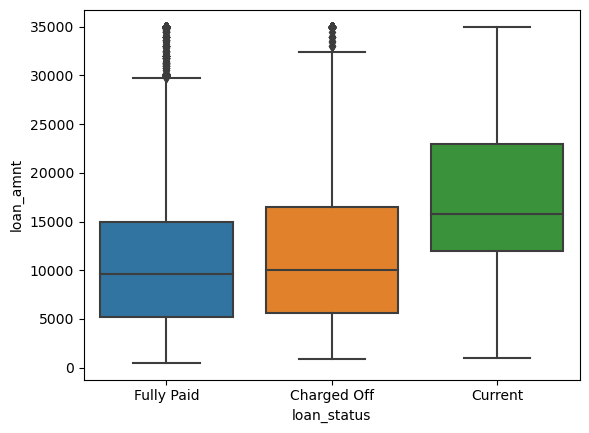

Boxplot of: loan_status & funded_amnt


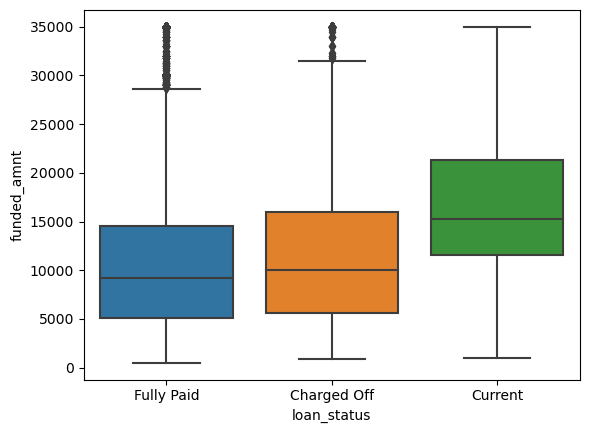

Boxplot of: loan_status & funded_amnt_inv


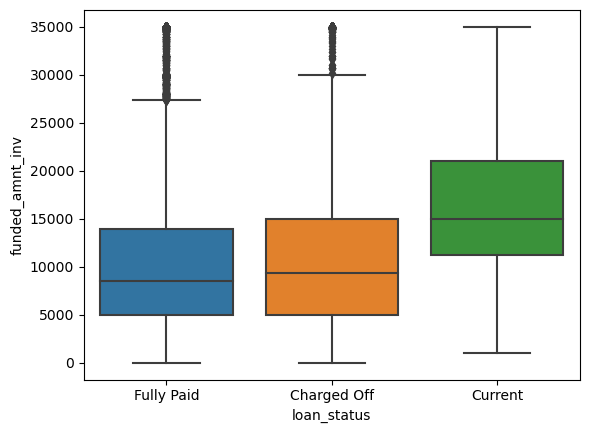

Boxplot of: loan_status & int_rate


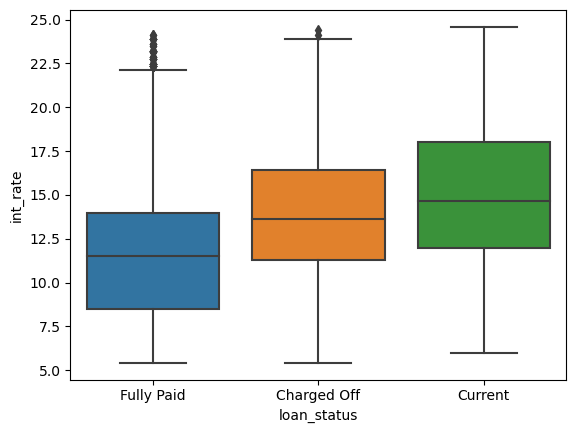

Boxplot of: loan_status & installment


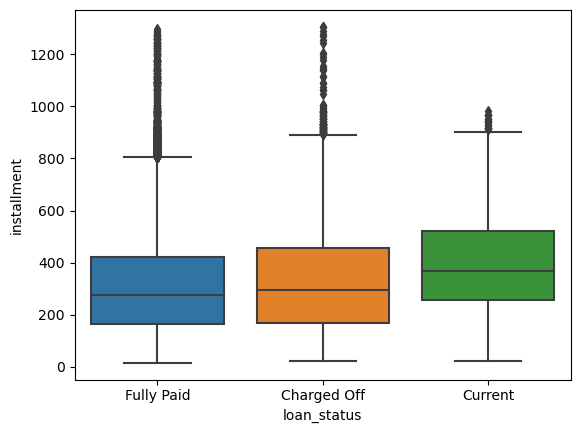

Boxplot of: loan_status & annual_inc


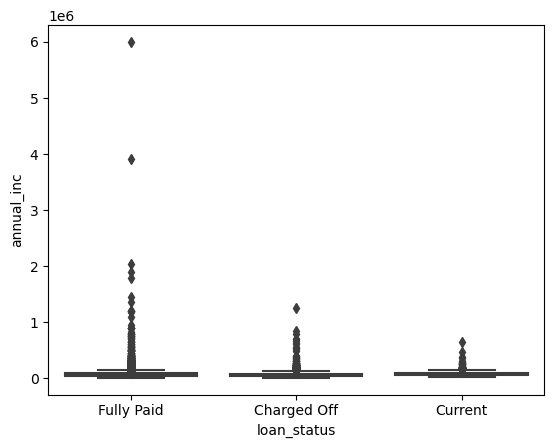

Boxplot of: loan_status & dti


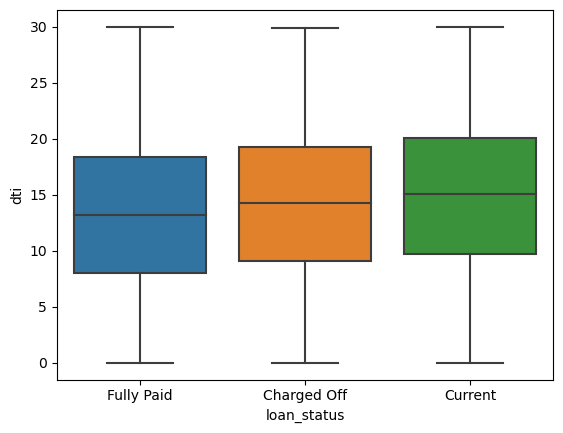

Boxplot of: loan_status & delinq_2yrs


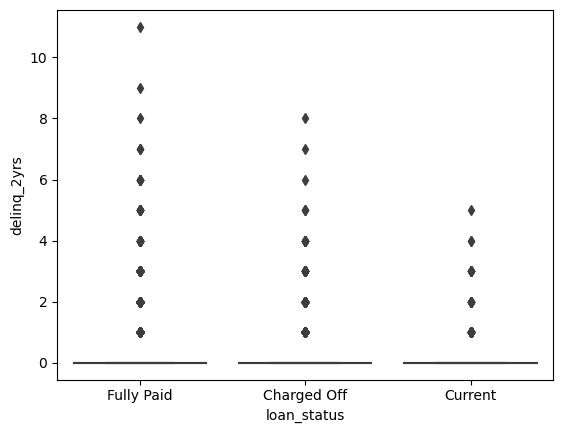

Boxplot of: loan_status & inq_last_6mths


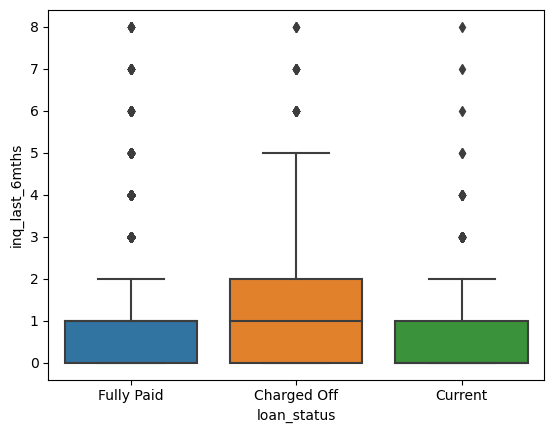

Boxplot of: loan_status & open_acc


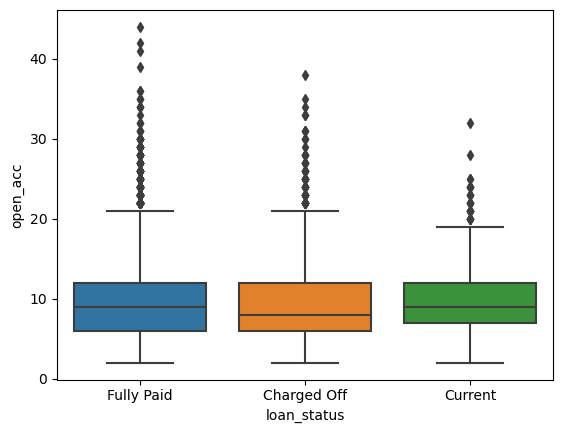

Boxplot of: loan_status & pub_rec


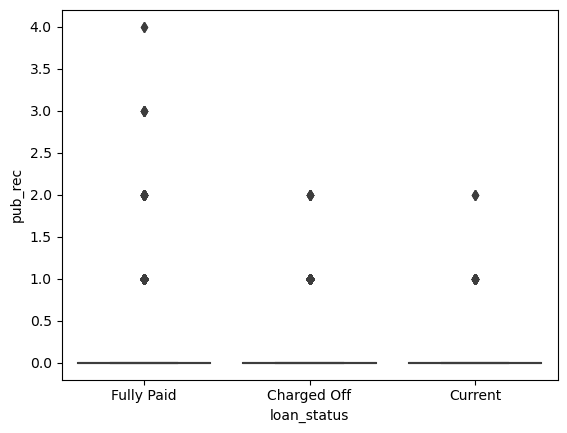

Boxplot of: loan_status & revol_bal


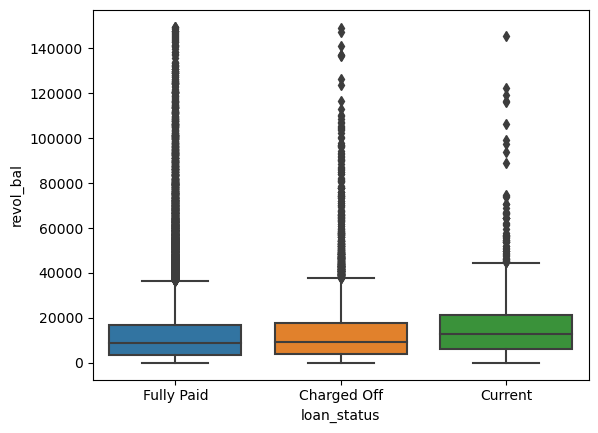

Boxplot of: loan_status & revol_util


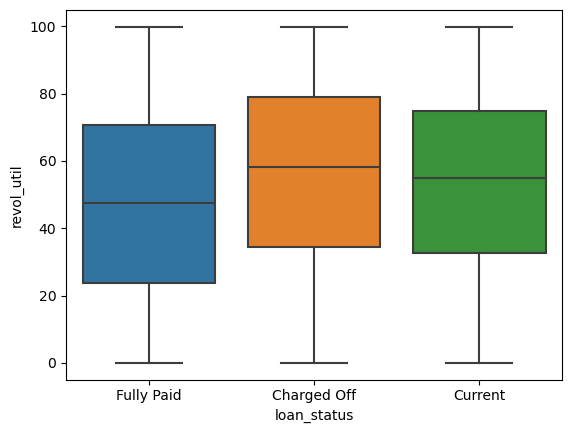

Boxplot of: loan_status & total_acc


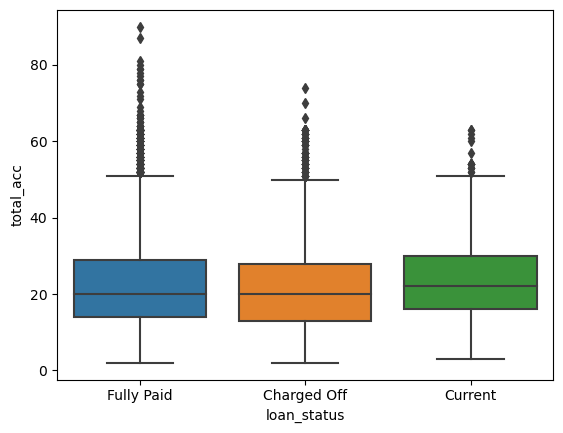

Boxplot of: loan_status & total_pymnt


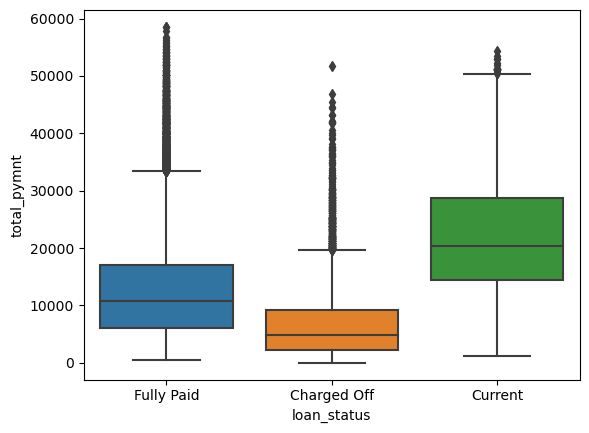

Boxplot of: purpose & loan_amnt


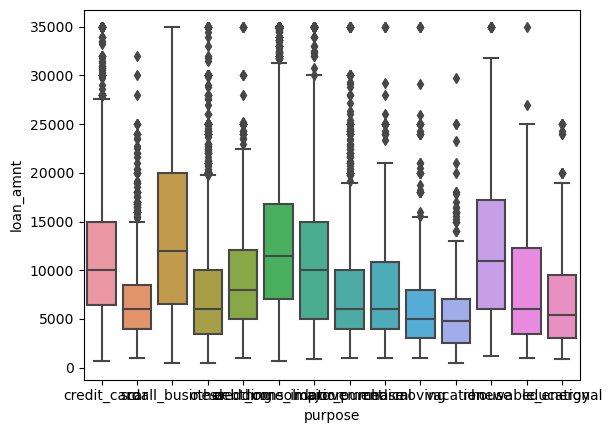

Boxplot of: purpose & funded_amnt


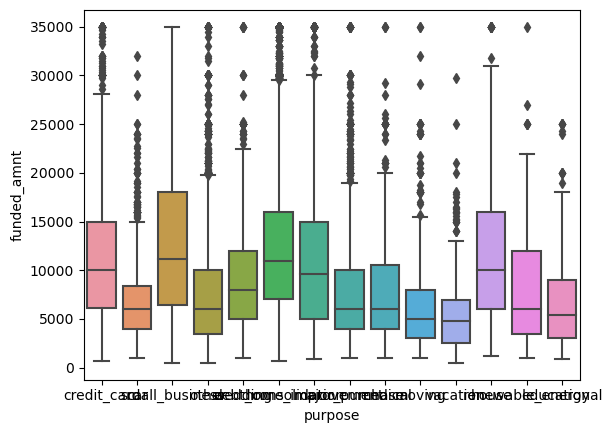

Boxplot of: purpose & funded_amnt_inv


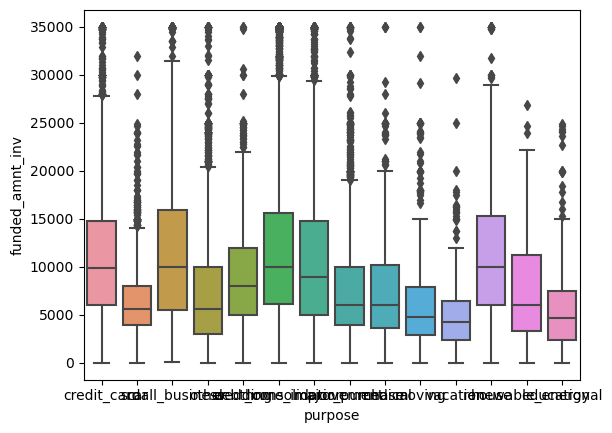

Boxplot of: purpose & int_rate


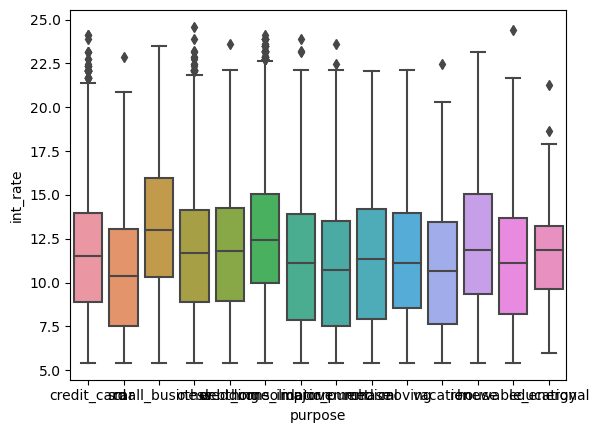

Boxplot of: purpose & installment


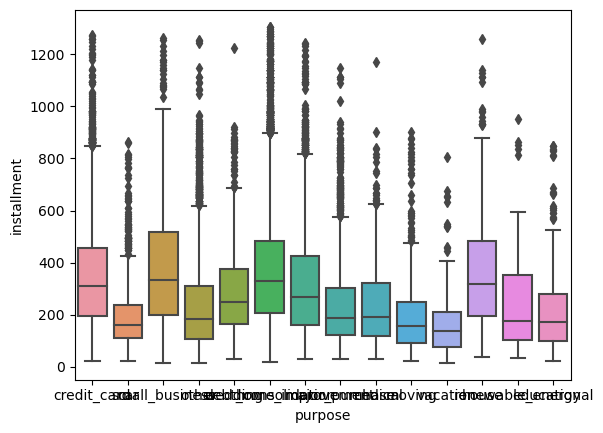

Boxplot of: purpose & annual_inc


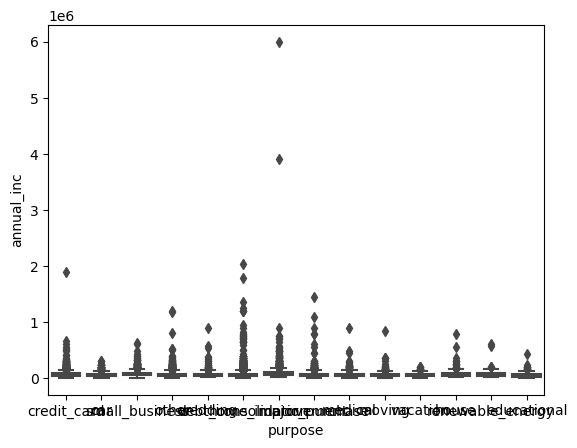

Boxplot of: purpose & dti


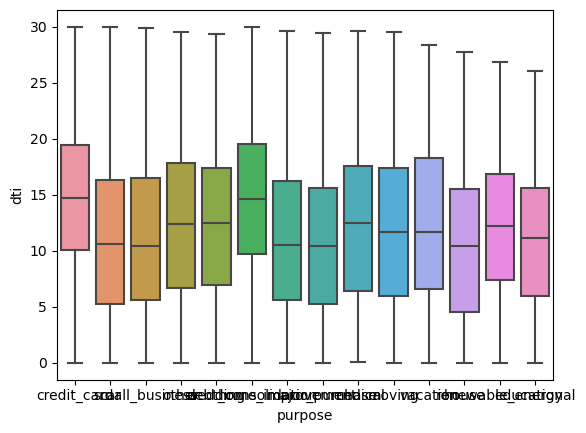

Boxplot of: purpose & delinq_2yrs


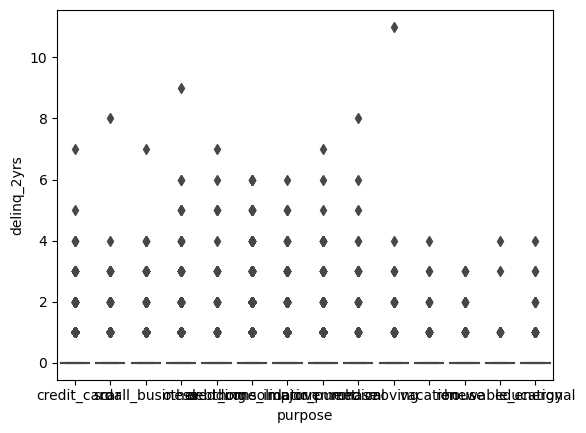

Boxplot of: purpose & inq_last_6mths


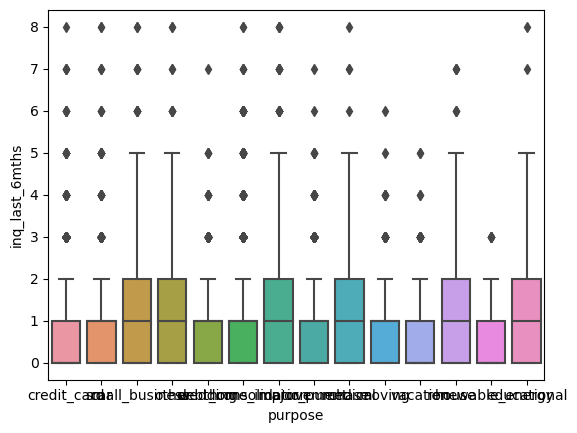

Boxplot of: purpose & open_acc


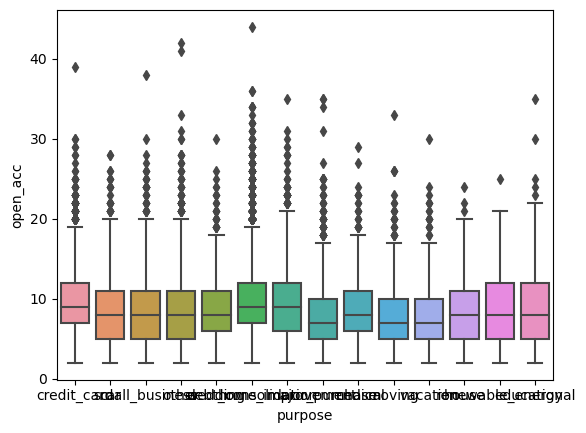

Boxplot of: purpose & pub_rec


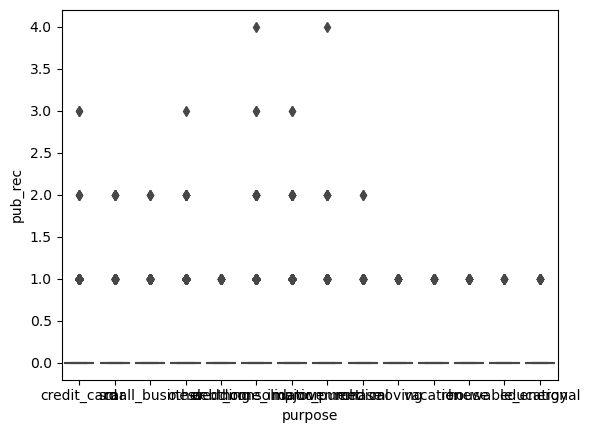

Boxplot of: purpose & revol_bal


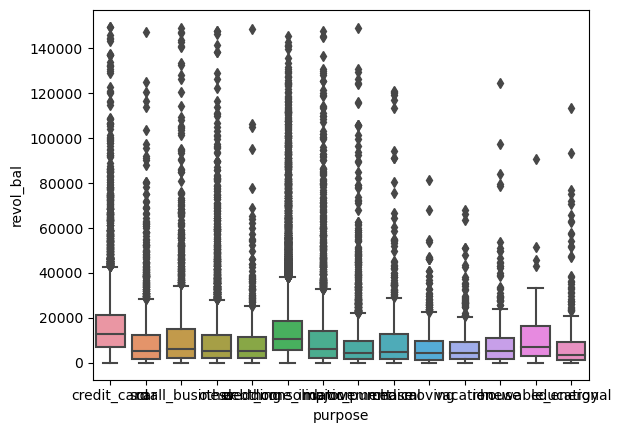

Boxplot of: purpose & revol_util


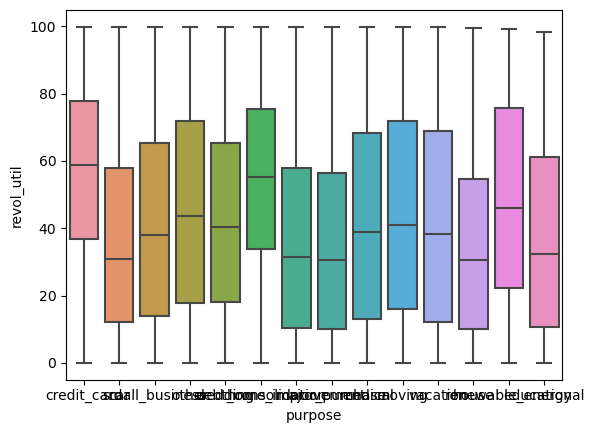

Boxplot of: purpose & total_acc


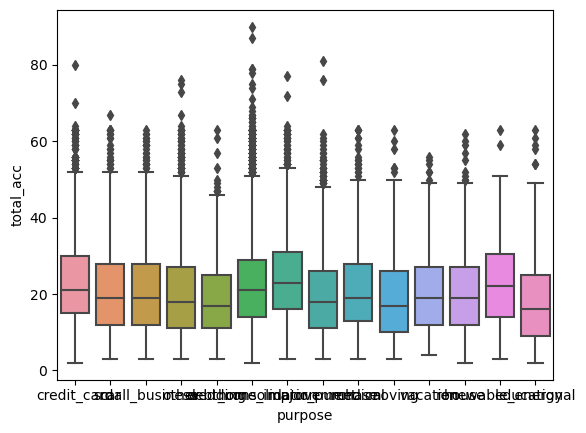

Boxplot of: purpose & total_pymnt


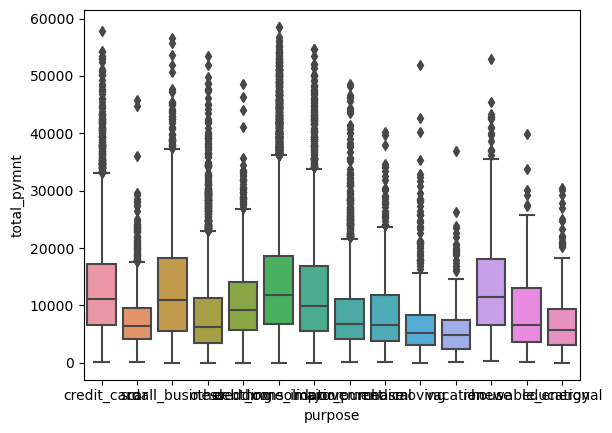

Boxplot of: application_type & loan_amnt


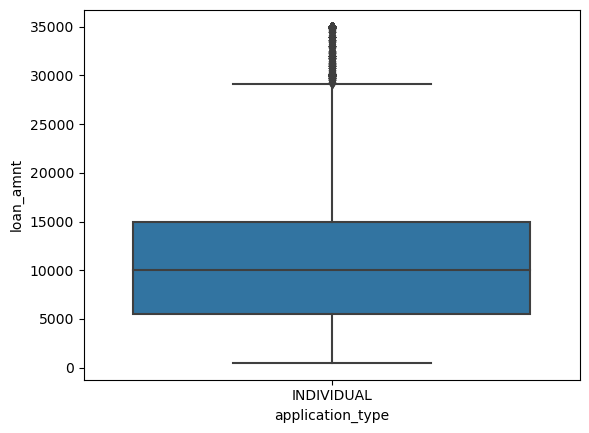

Boxplot of: application_type & funded_amnt


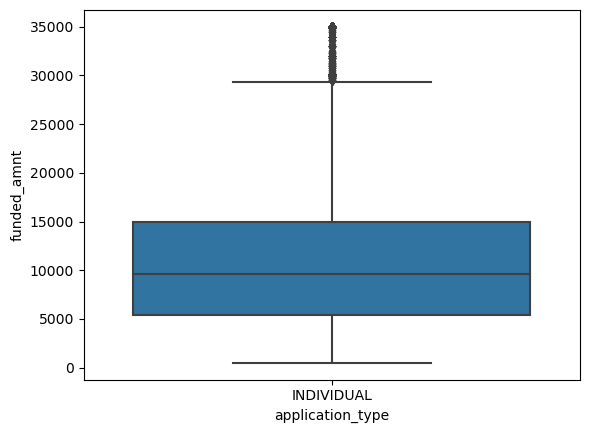

Boxplot of: application_type & funded_amnt_inv


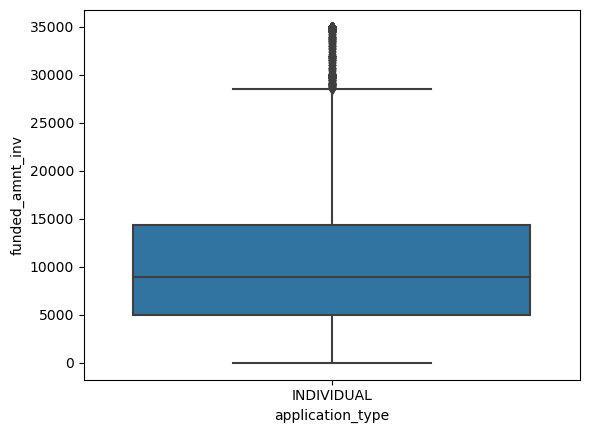

Boxplot of: application_type & int_rate


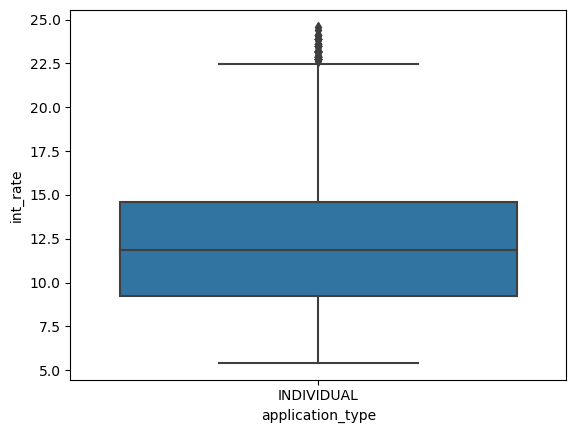

Boxplot of: application_type & installment


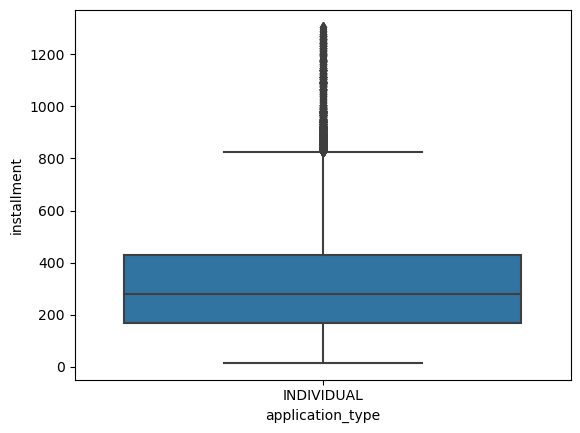

Boxplot of: application_type & annual_inc


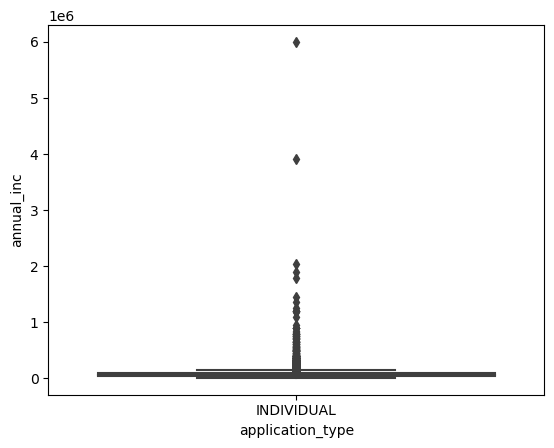

Boxplot of: application_type & dti


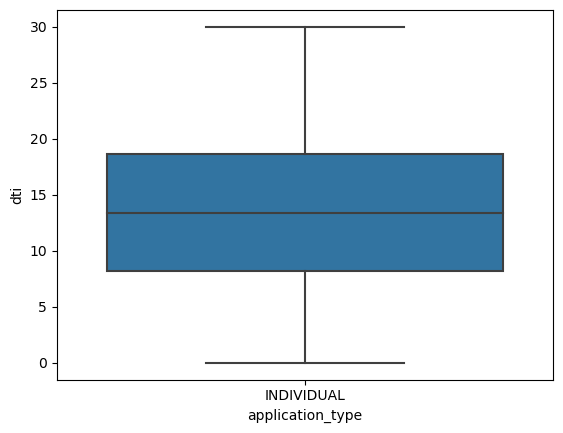

Boxplot of: application_type & delinq_2yrs


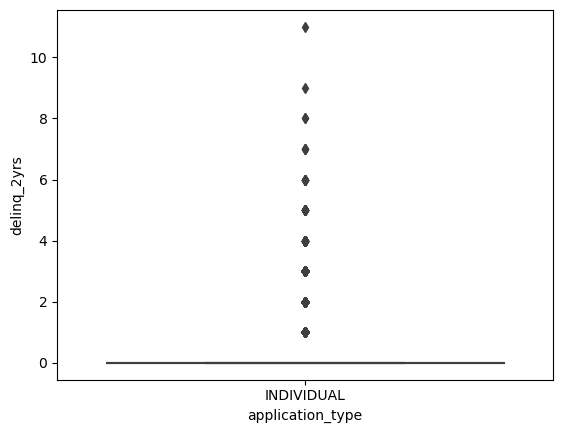

Boxplot of: application_type & inq_last_6mths


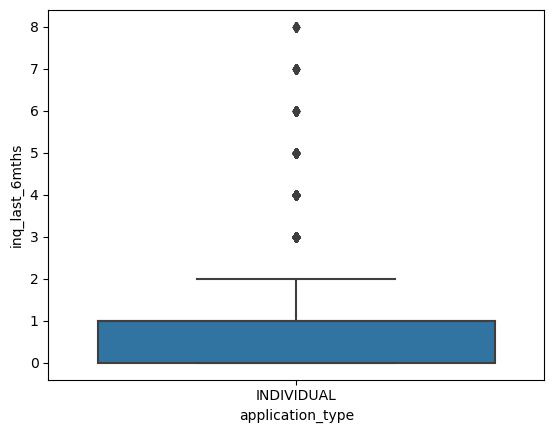

Boxplot of: application_type & open_acc


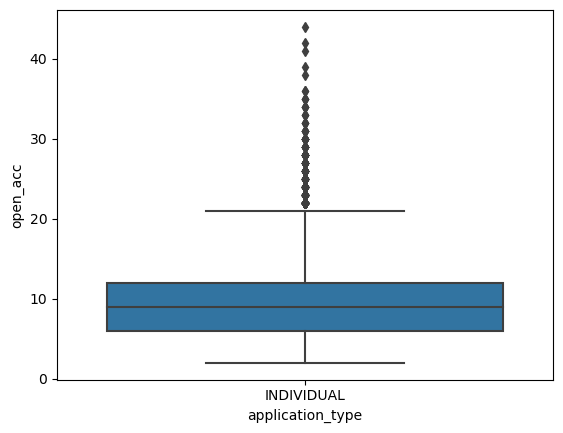

Boxplot of: application_type & pub_rec


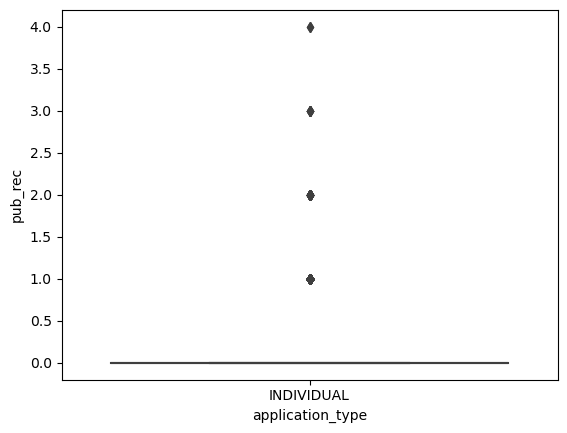

Boxplot of: application_type & revol_bal


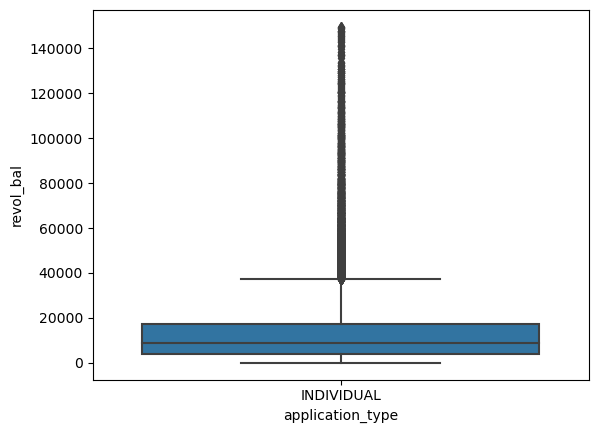

Boxplot of: application_type & revol_util


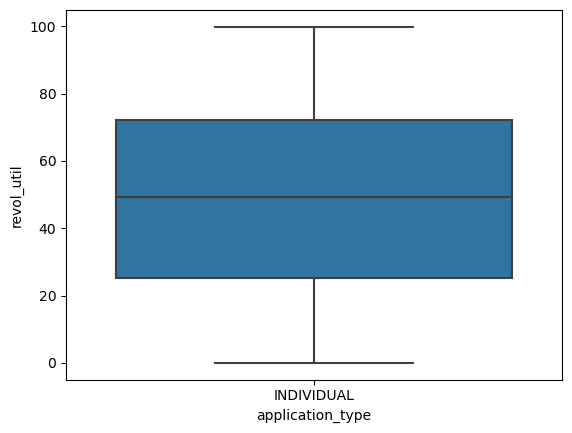

Boxplot of: application_type & total_acc


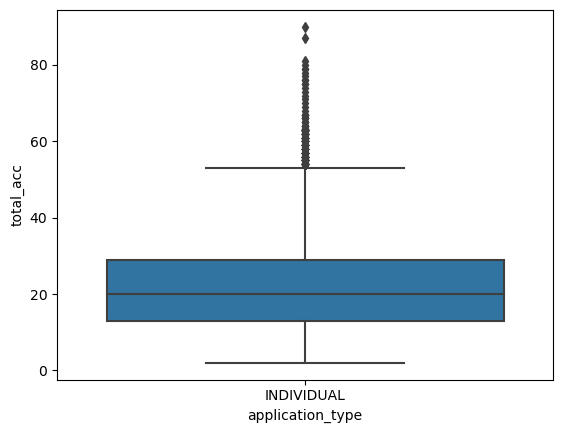

Boxplot of: application_type & total_pymnt


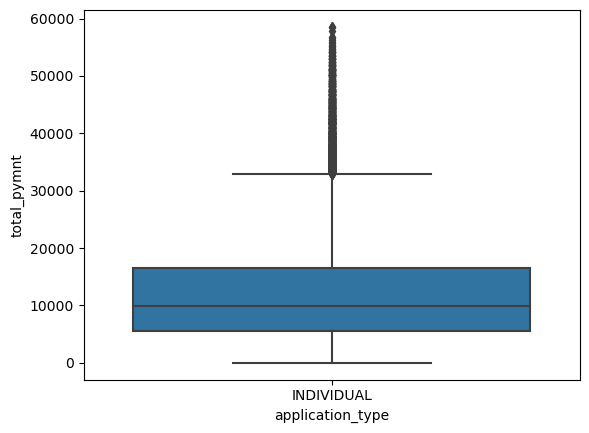

In [1232]:
for i in cat_cols:
    for j in cont_cols:
        print("Boxplot of: "+i+" & "+j)
        sns.boxplot(loan_df[i], loan_df[j])
        plt.show()

#### collecting numeric columns in a list

In [1233]:
cont_cols = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "total_pymnt"]

#### plotting histograms for cat_cols

Histogram of: loan_amnt


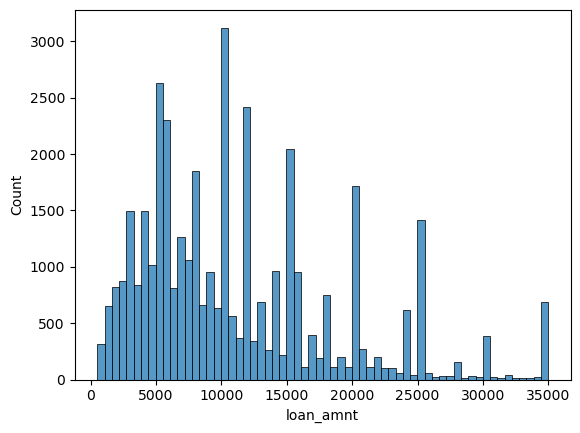

Histogram of: funded_amnt


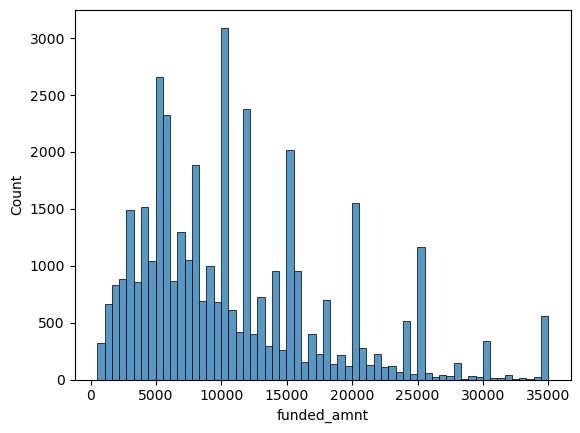

Histogram of: funded_amnt_inv


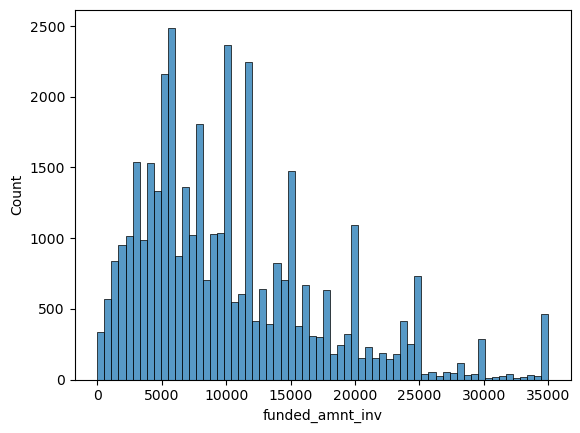

Histogram of: int_rate


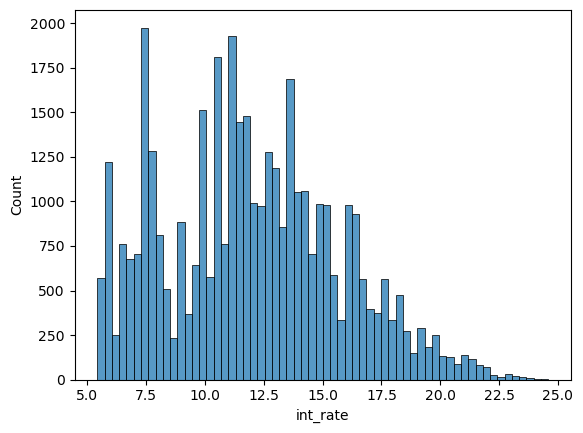

Histogram of: installment


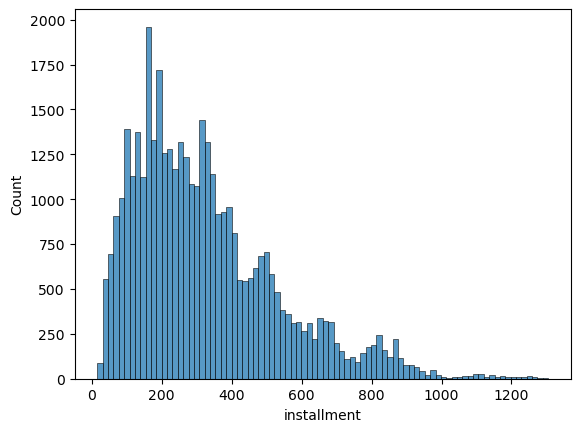

Histogram of: annual_inc


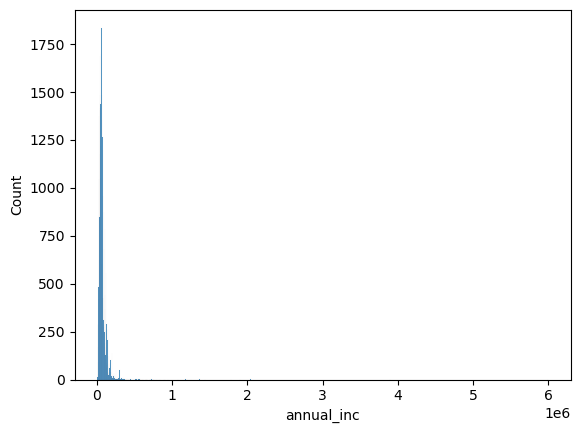

Histogram of: dti


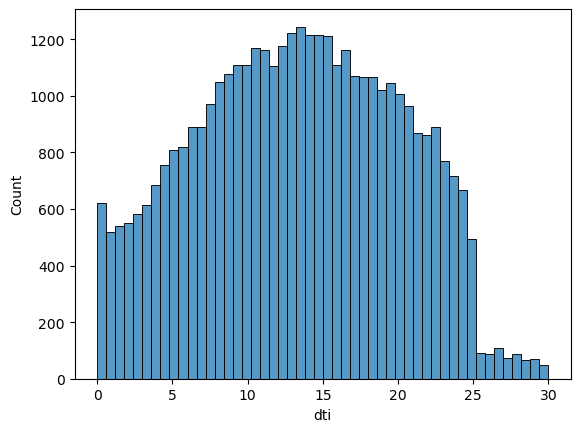

Histogram of: delinq_2yrs


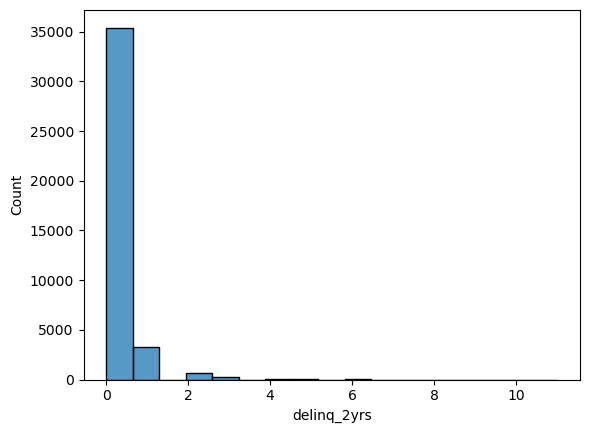

Histogram of: inq_last_6mths


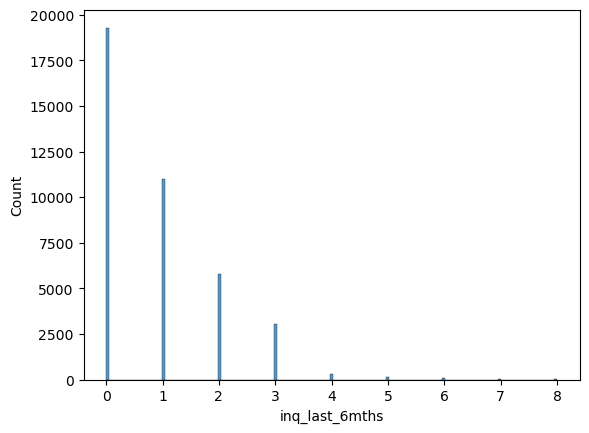

Histogram of: open_acc


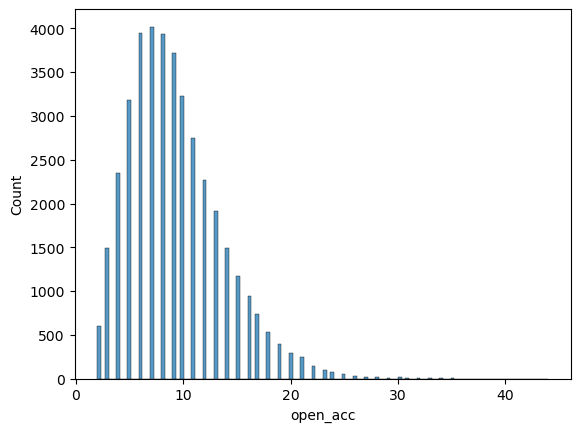

Histogram of: pub_rec


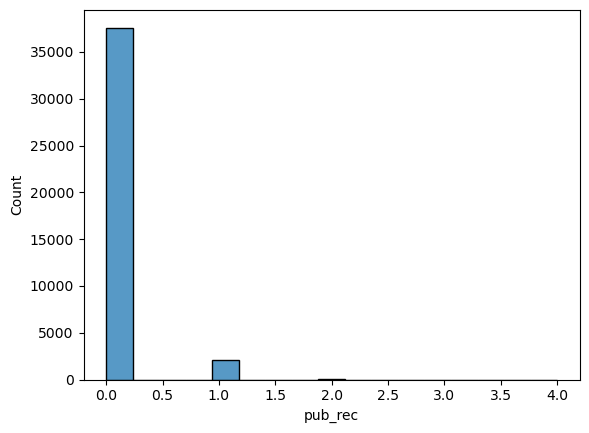

Histogram of: revol_bal


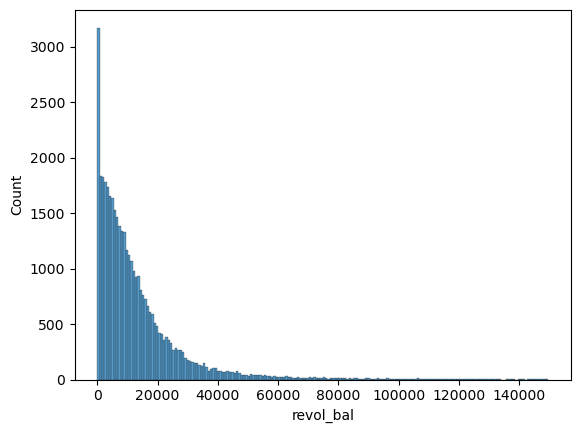

Histogram of: revol_util


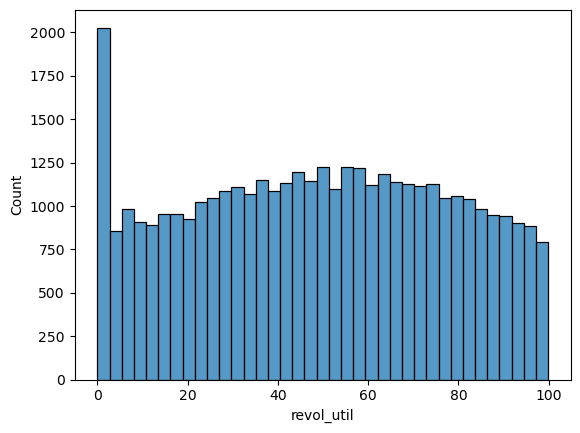

Histogram of: total_acc


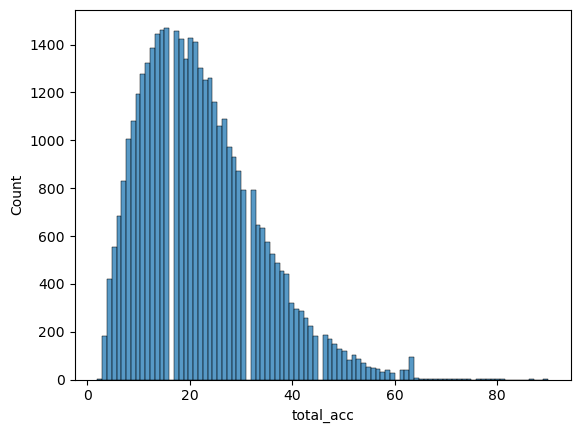

Histogram of: total_pymnt


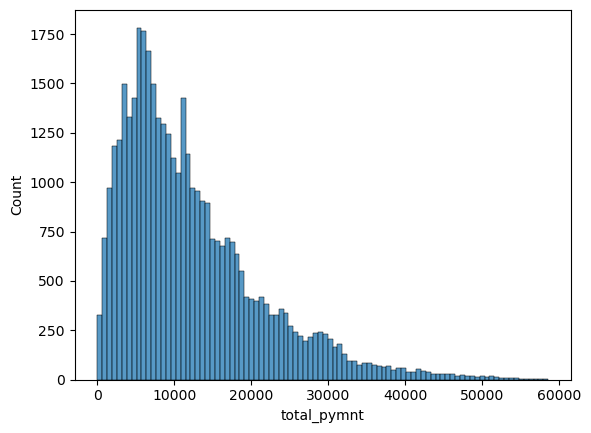

In [1234]:
for i in cont_cols:
    print("Histogram of: " + i)
    sns.histplot(loan_df[i])
    plt.show()